# 示例：输出轴承特征图
- 前半部分 XJTU数据集
- 后半部分 PHM2012数据集

In [1]:
from rulframework.data.feature.RMSFeatureExtractor import RMSFeatureExtractor
from rulframework.data.raw.XJTUDataLoader import XJTUDataLoader
from rulframework.data.raw.PHM2012DataLoader import PHM2012DataLoader
from rulframework.data.stage.BearingStageCalculator import BearingStageCalculator
from rulframework.data.stage.eol.NinetyThreePercentRMSEoLCalculator import NinetyThreePercentRMSEoLCalculator
from rulframework.data.stage.fpt.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from rulframework.util.Plotter import Plotter
from rulframework.util.Timer import Timer

## 设置轴承全寿命阶段划分算法
- FPT使用3σ算法
- Eol使用93%RMS算法

In [2]:
fpt_calculator = ThreeSigmaFPTCalculator()
eol_calculator = NinetyThreePercentRMSEoLCalculator()

## ⭐ 生成XJTU数据集所有轴承特征图

In [3]:
data_loader = XJTUDataLoader('D:\\data\\dataset\\XJTU-SY_Bearing_Datasets')

INFO - 15:37:18 >> 
     █████╗ ███╗   ██╗██████╗ ██████╗ ███████╗██╗    ██╗    ███████╗████████╗██╗   ██╗██████╗ ██╗ ██████╗ 
     ██╔══██╗████╗  ██║██╔══██╗██╔══██╗██╔════╝██║    ██║    ██╔════╝╚══██╔══╝██║   ██║██╔══██╗██║██╔═══██╗
     ███████║██╔██╗ ██║██║  ██║██████╔╝█████╗  ██║ █╗ ██║    ███████╗   ██║   ██║   ██║██║  ██║██║██║   ██║
     ██╔══██║██║╚██╗██║██║  ██║██╔══██╗██╔══╝  ██║███╗██║    ╚════██║   ██║   ██║   ██║██║  ██║██║██║   ██║
     ██║  ██║██║ ╚████║██████╔╝██║  ██║███████╗╚███╔███╔╝    ███████║   ██║   ╚██████╔╝██████╔╝██║╚██████╔╝
     ╚═╝  ╚═╝╚═╝  ╚═══╝╚═════╝ ╚═╝  ╚═╝╚══════╝ ╚══╝╚══╝     ╚══════╝   ╚═╝    ╚═════╝ ╚═════╝ ╚═╝ ╚═════╝                                                                                                  
    
DEBUG - 15:37:18 >> 
<<<< 数据集位置：D:\data\dataset\XJTU-SY_Bearing_Datasets >>>>
>> 已成功登记以下数据项：
  Bearing1_1，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_1
  Bearing1_2，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35

In [4]:
feature_extractor = RMSFeatureExtractor(data_loader.continuum)
stage_calculator = BearingStageCalculator(fpt_calculator, eol_calculator, data_loader.continuum)

In [5]:
def plot(name):
    Timer.start()
    bearing = data_loader.get_bearing(name, columns='Horizontal Vibration')
    bearing.feature_data = feature_extractor.extract(bearing.raw_data)
    stage_calculator.calculate_state(bearing)
    Timer.stop()
    Plotter.feature(bearing)

#### 使用循环一次性输出所有特征图
此处因为图片太多notebook会自动压缩格子，导致不方便查看
所以注释代码，实际使用建议用循环

In [6]:
# for bearing_name in data_loader.all:
#     bearing = data_loader.get_bearing(bearing_name, columns='Horizontal Vibration')
#     bearing.feature_data = feature_extractor.extract(bearing.raw_data)
#     stage_calculator.calculate_state(bearing)
#     bearing.plot_feature()

计时时长：1.32 s


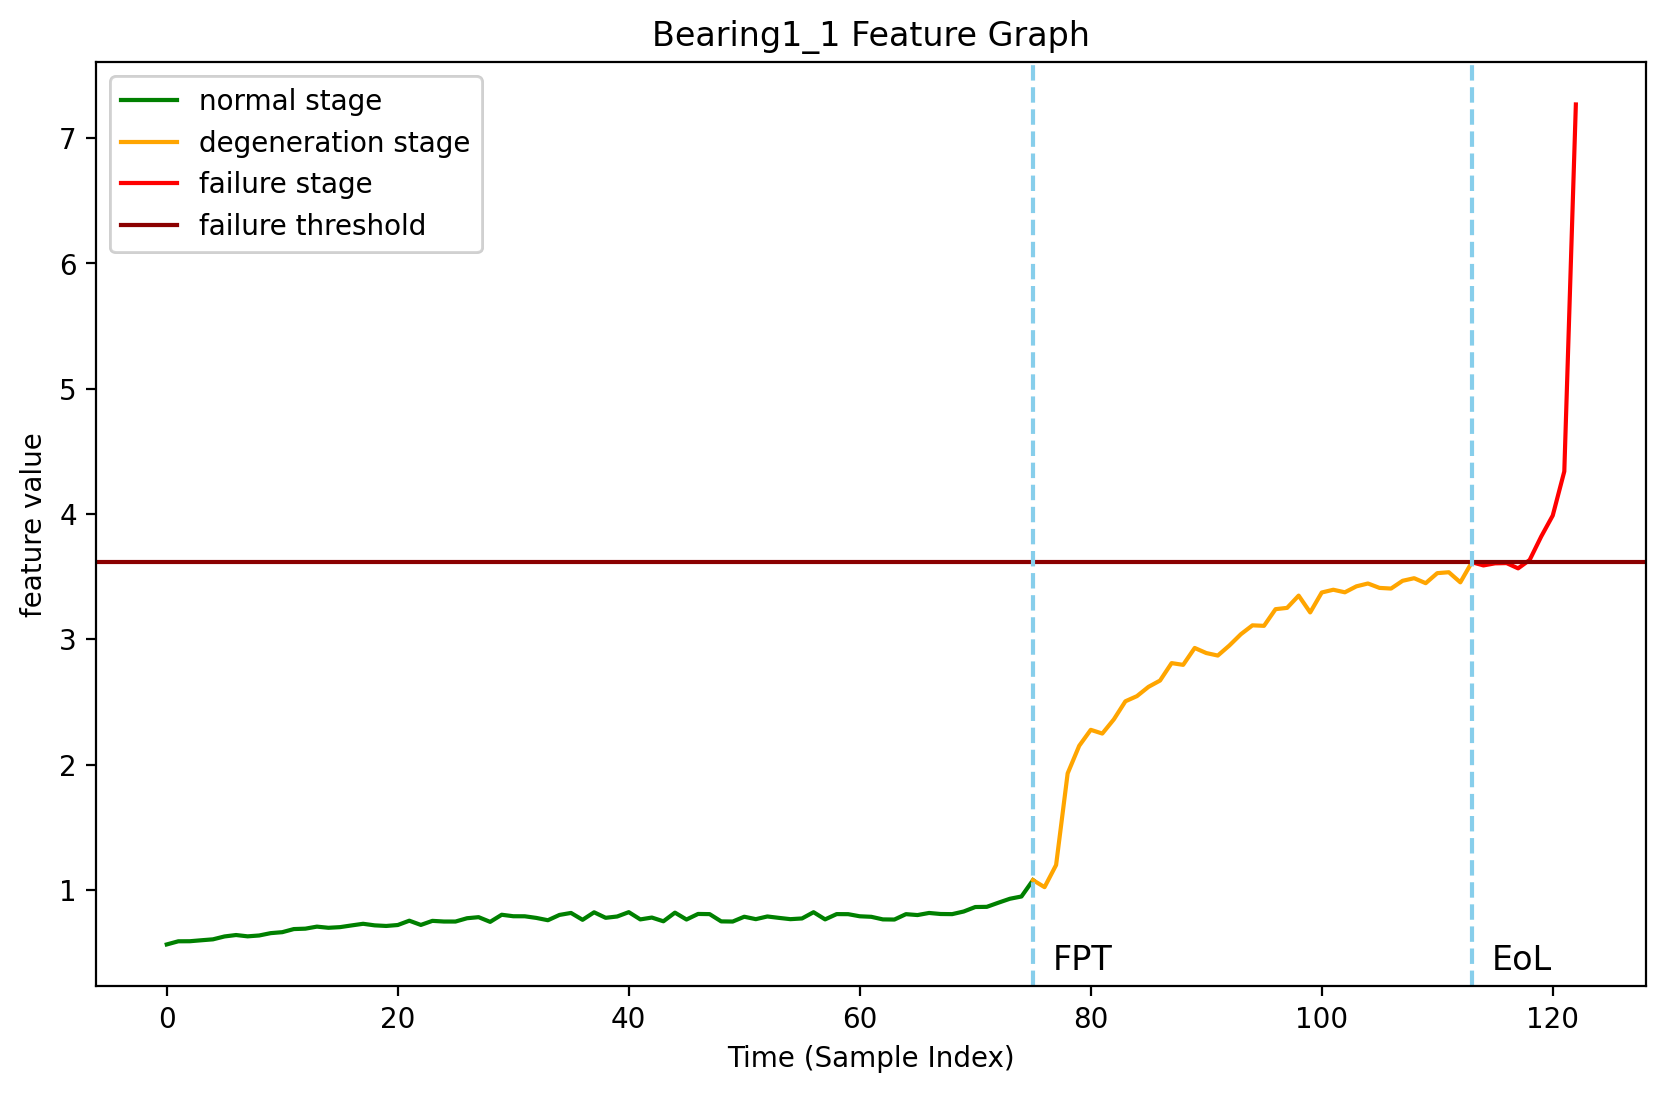

In [7]:
plot("Bearing1_1")

计时时长：1.73 s


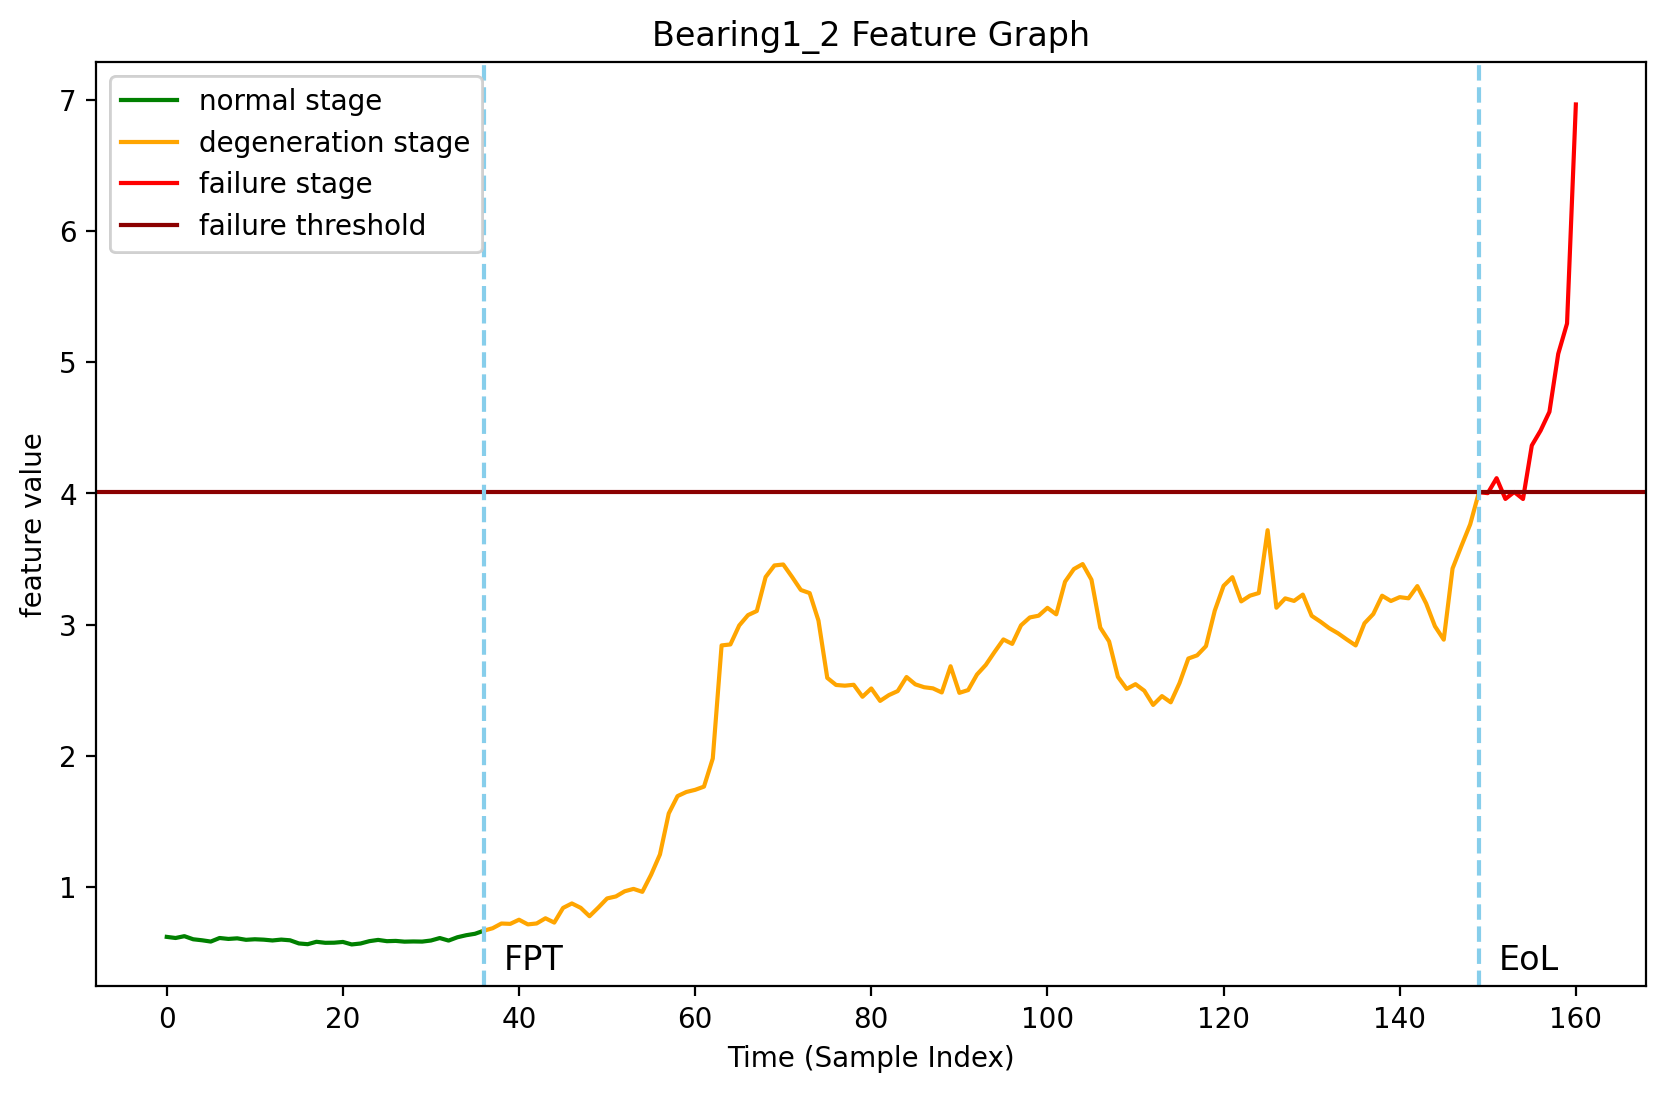

In [8]:
plot("Bearing1_2")

计时时长：1.75 s


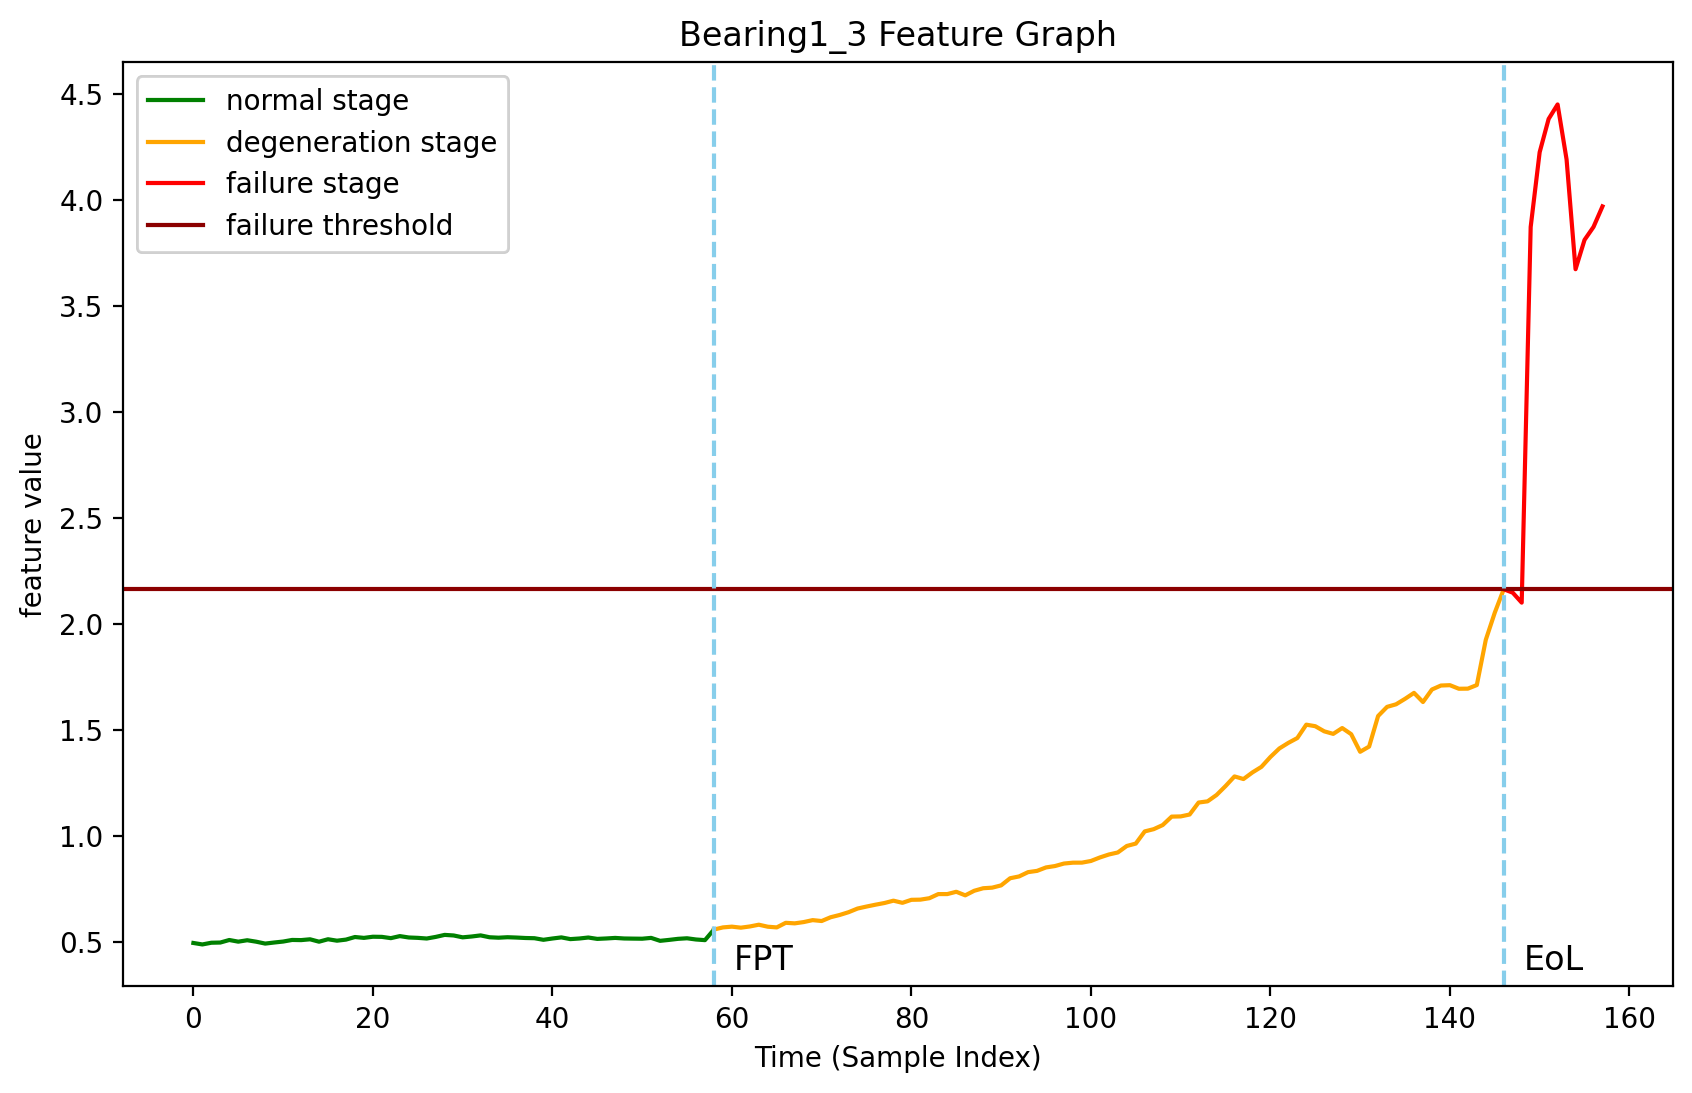

In [9]:
plot("Bearing1_3")

计时时长：1.31 s


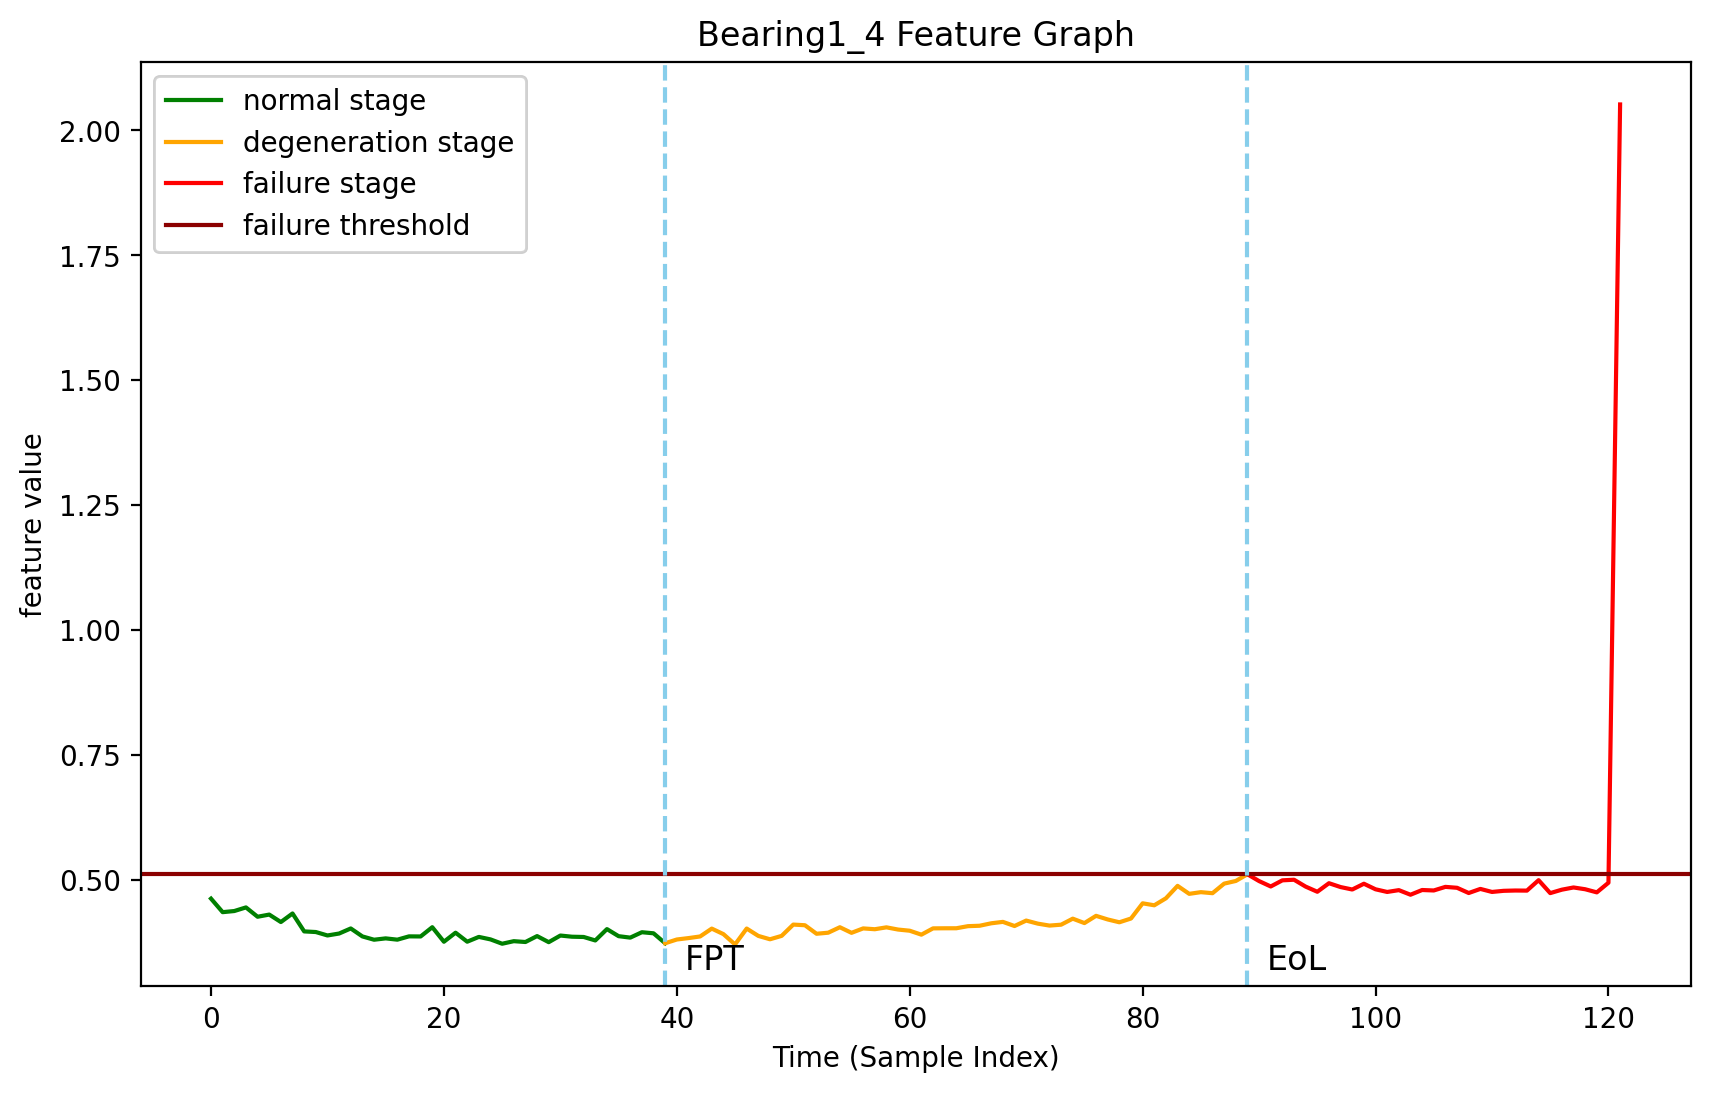

In [10]:
plot("Bearing1_4")

计时时长：0.65 s


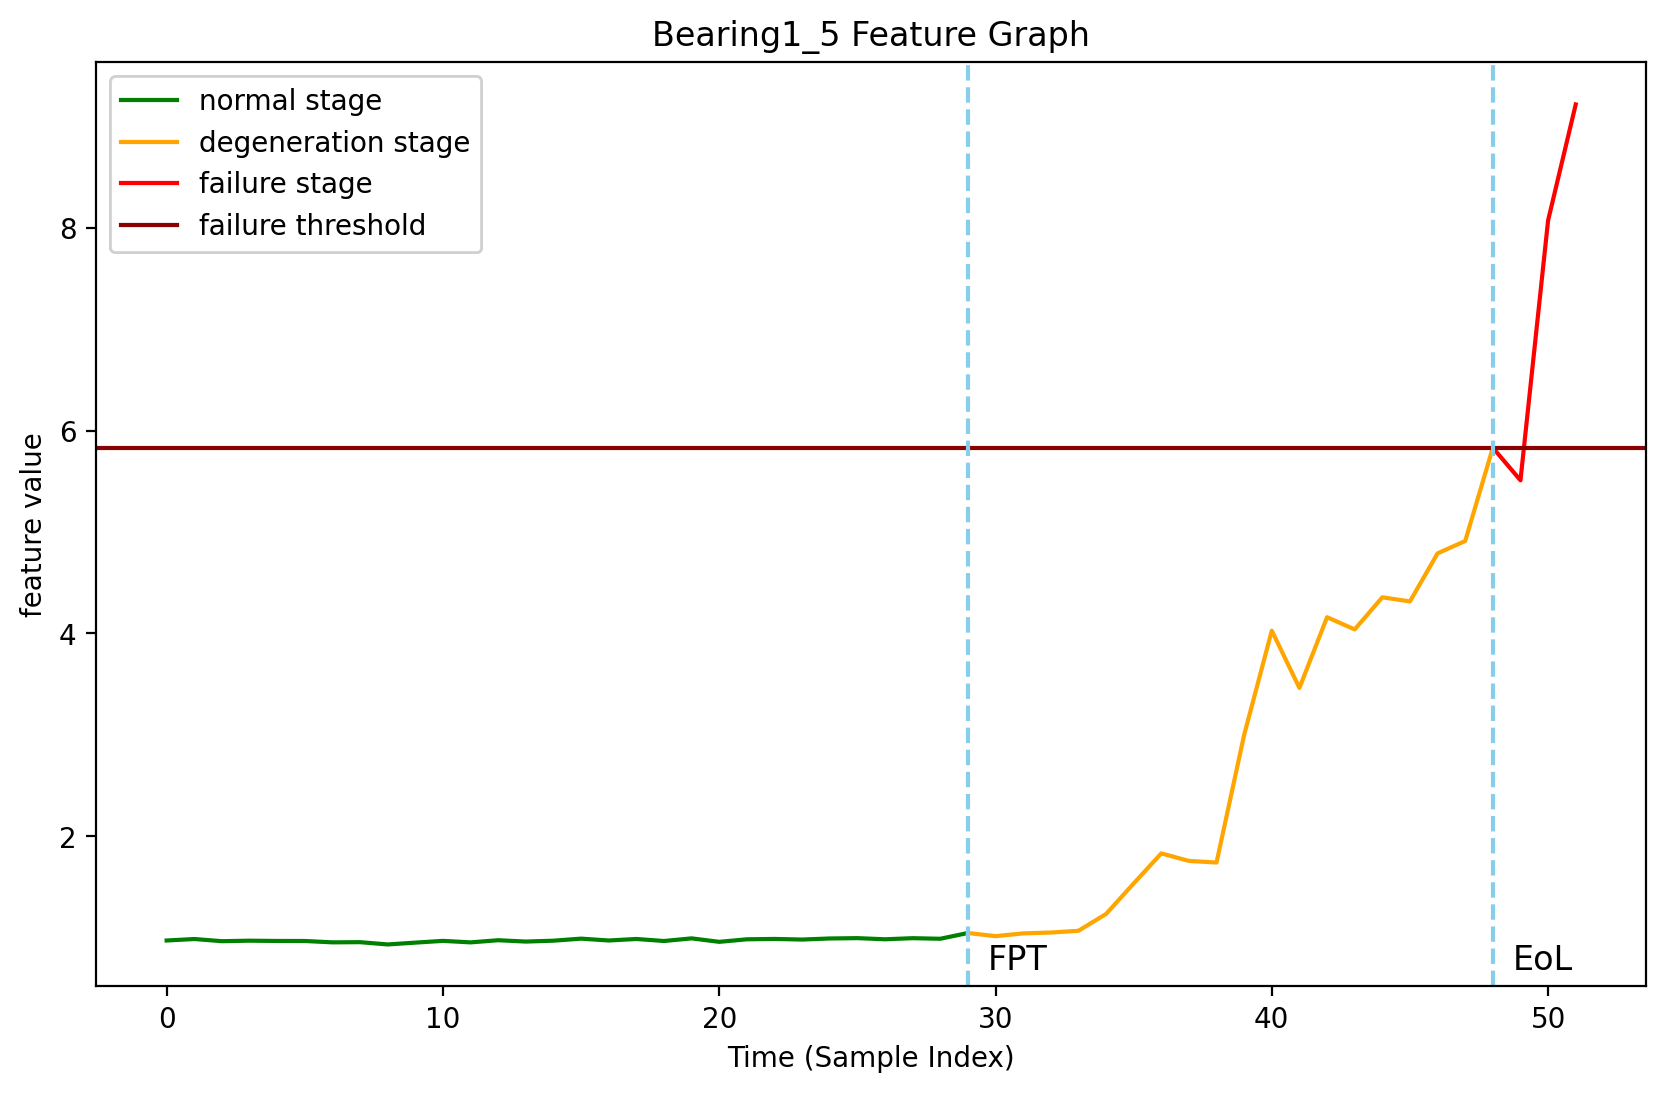

In [11]:
plot("Bearing1_5")

计时时长：5.3 s


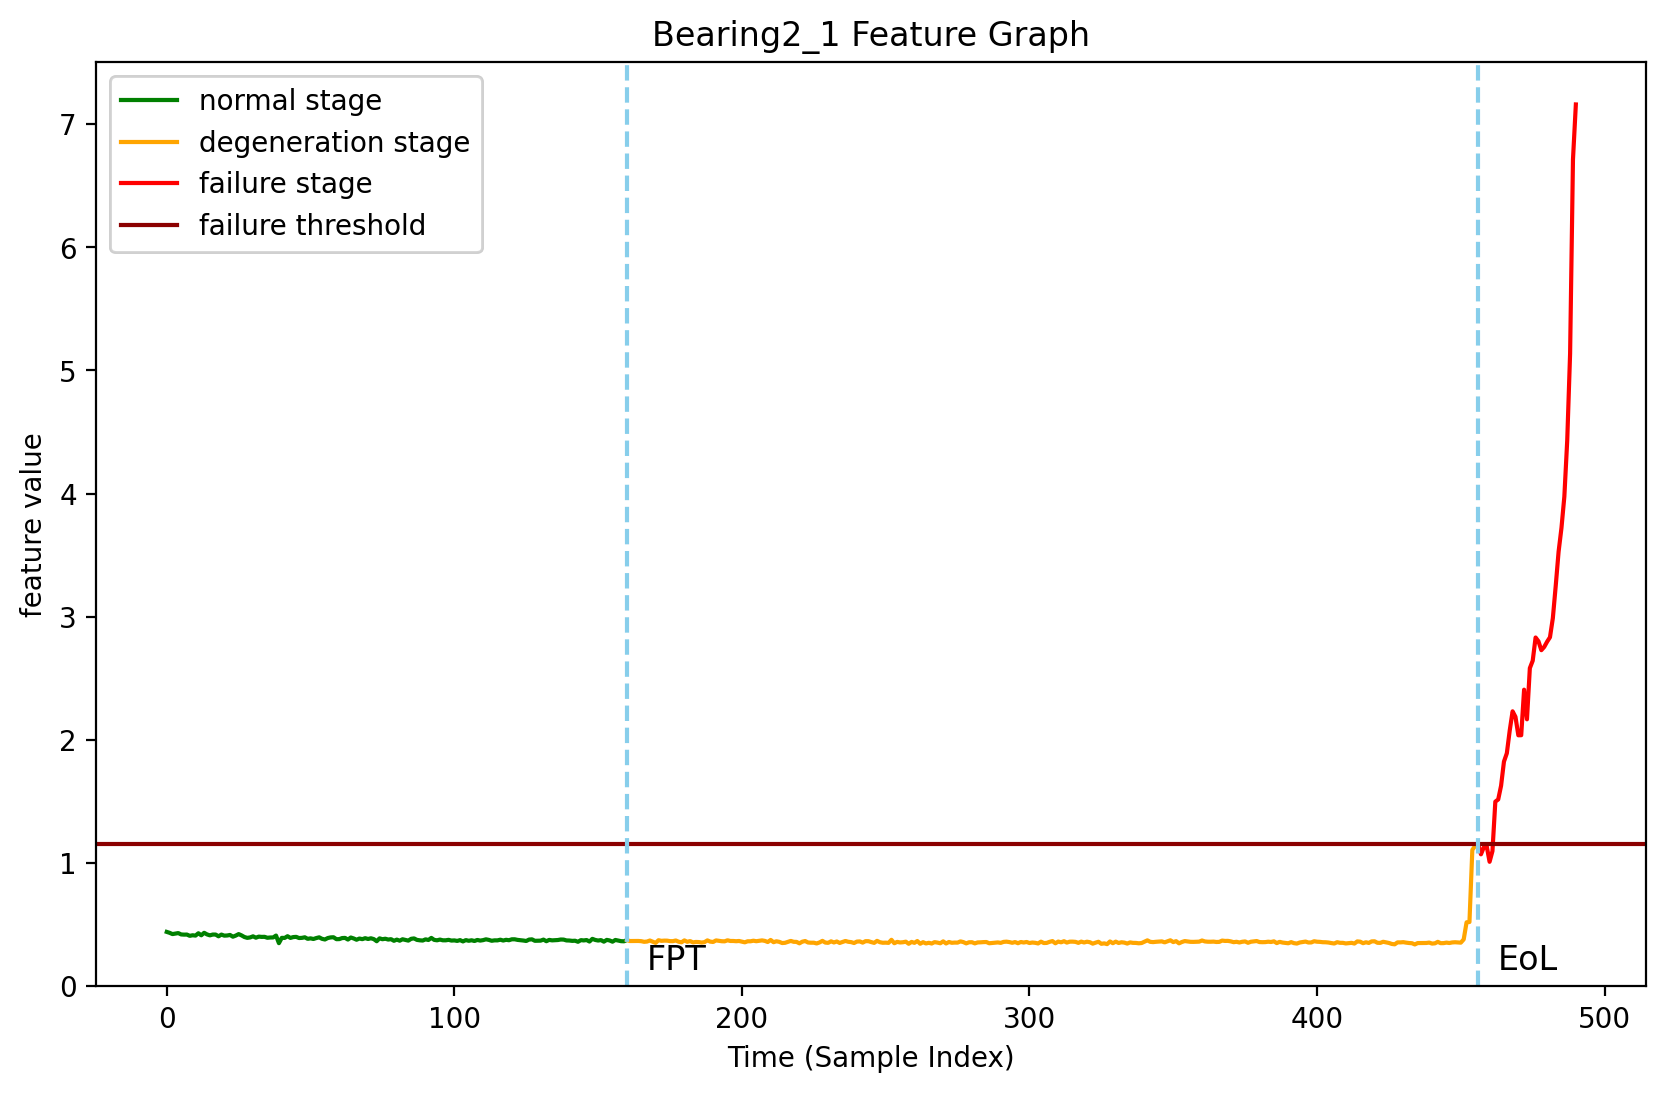

In [12]:
plot("Bearing2_1")

计时时长：1.95 s


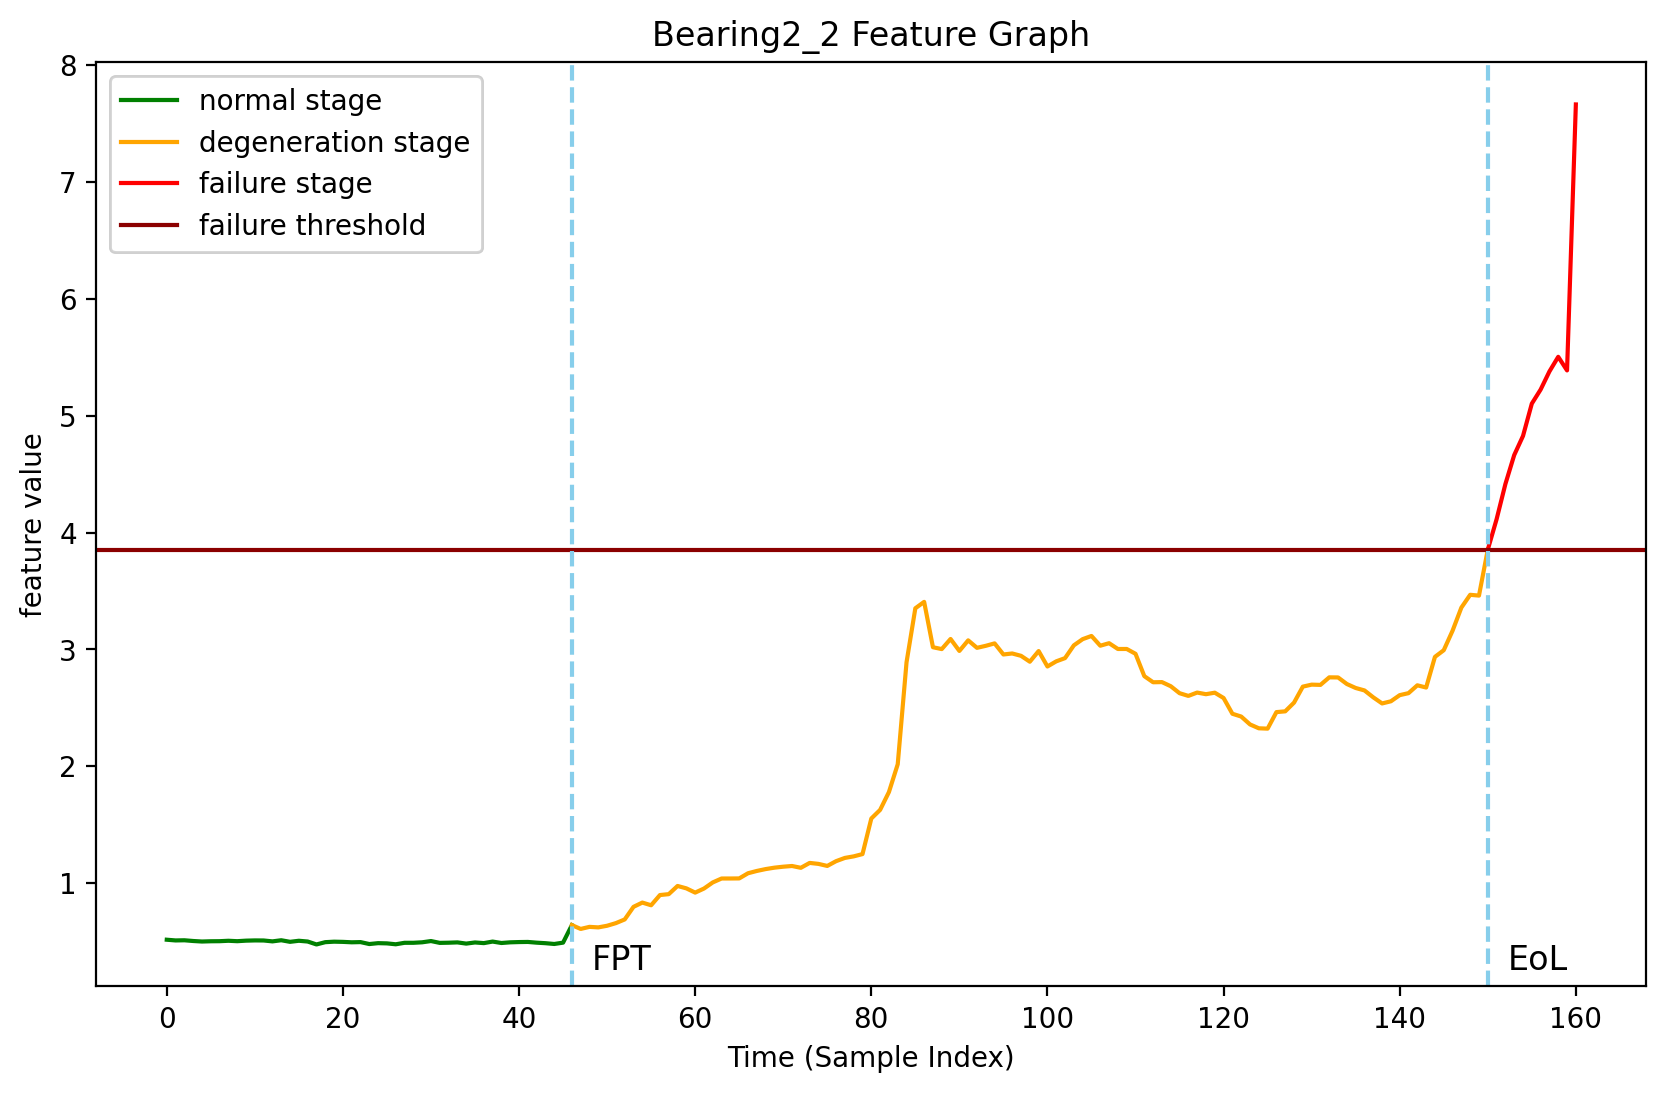

In [13]:
plot("Bearing2_2")

计时时长：6.16 s


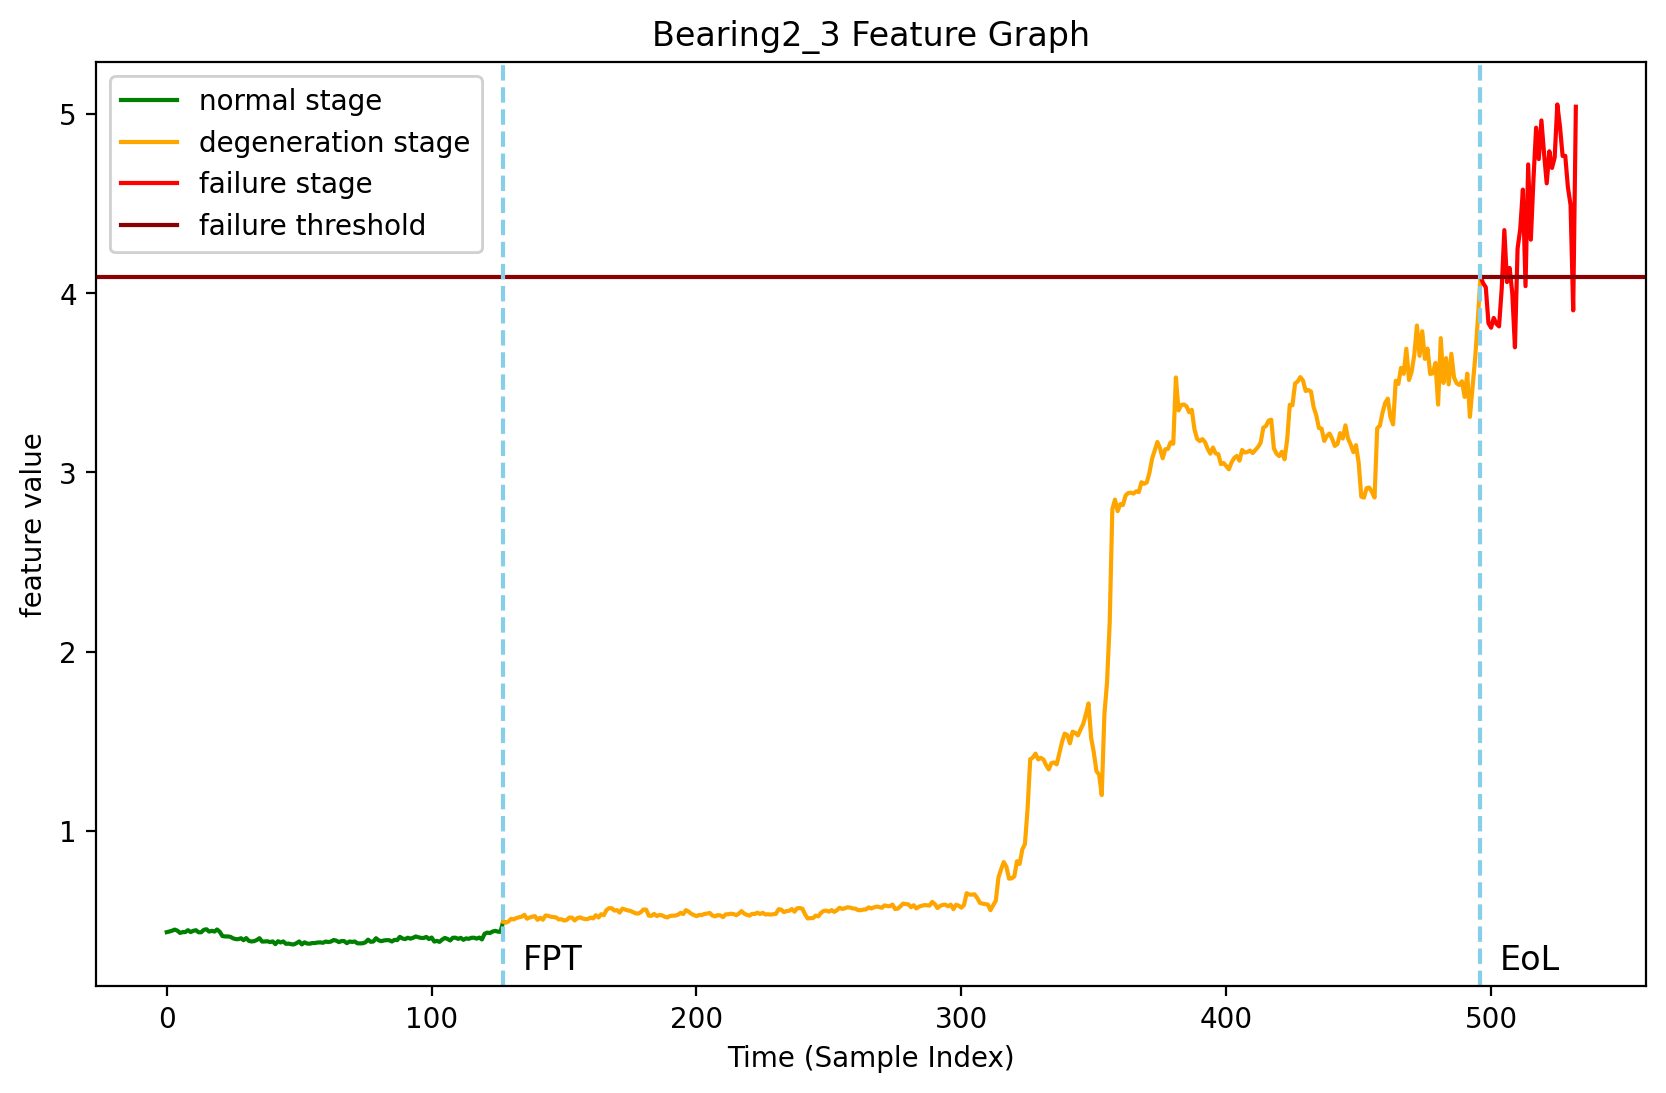

In [14]:
plot("Bearing2_3")

计时时长：1.0 s


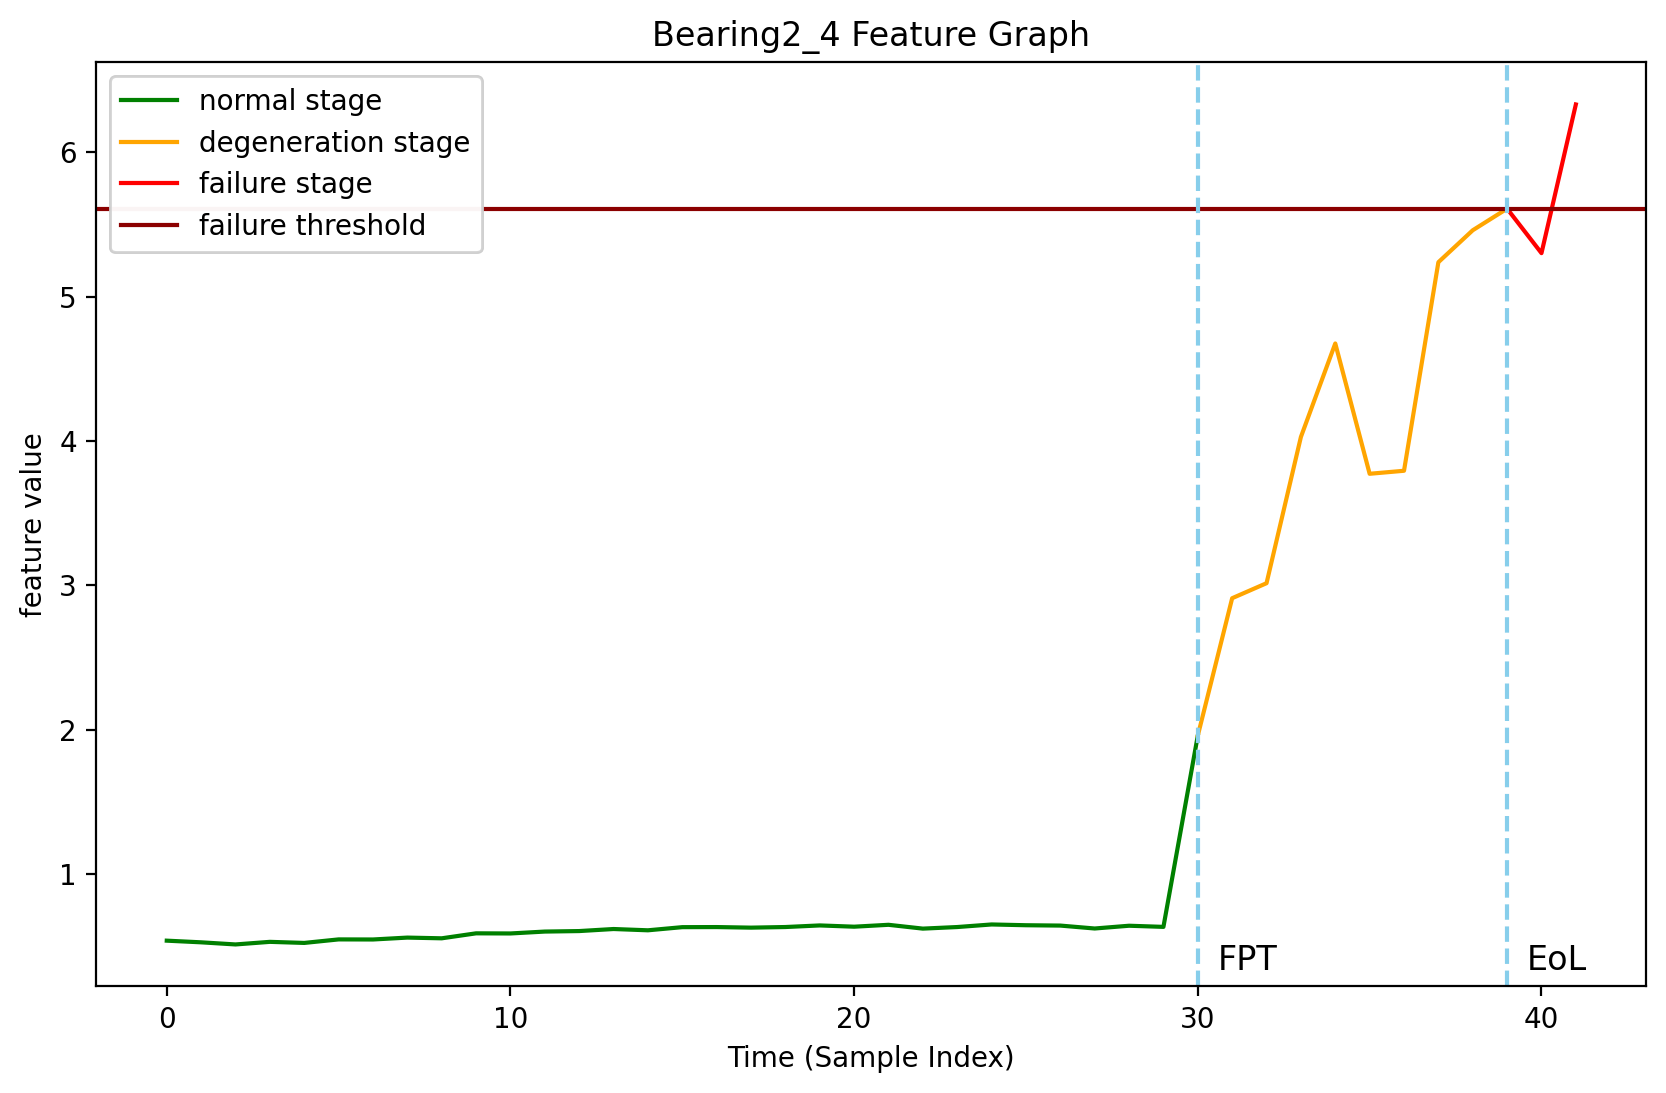

In [15]:
plot("Bearing2_4")

计时时长：6.32 s


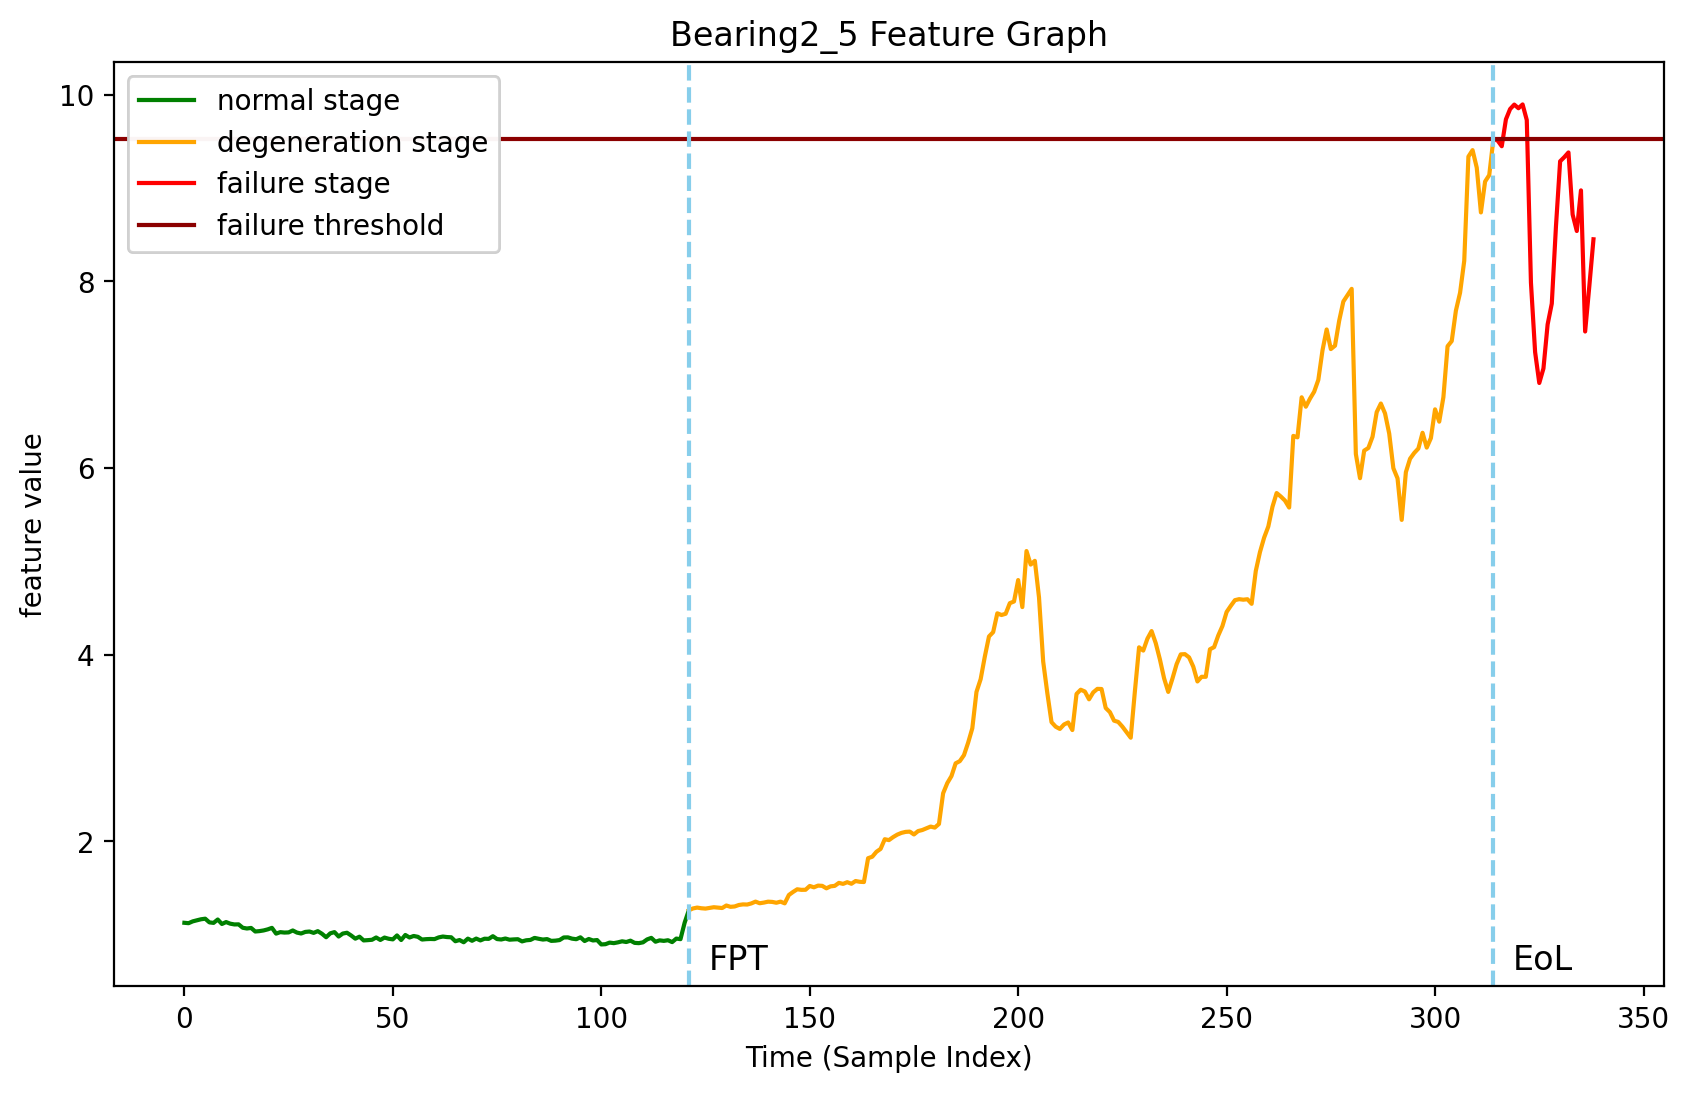

In [16]:
plot("Bearing2_5")

计时时长：41.4 s


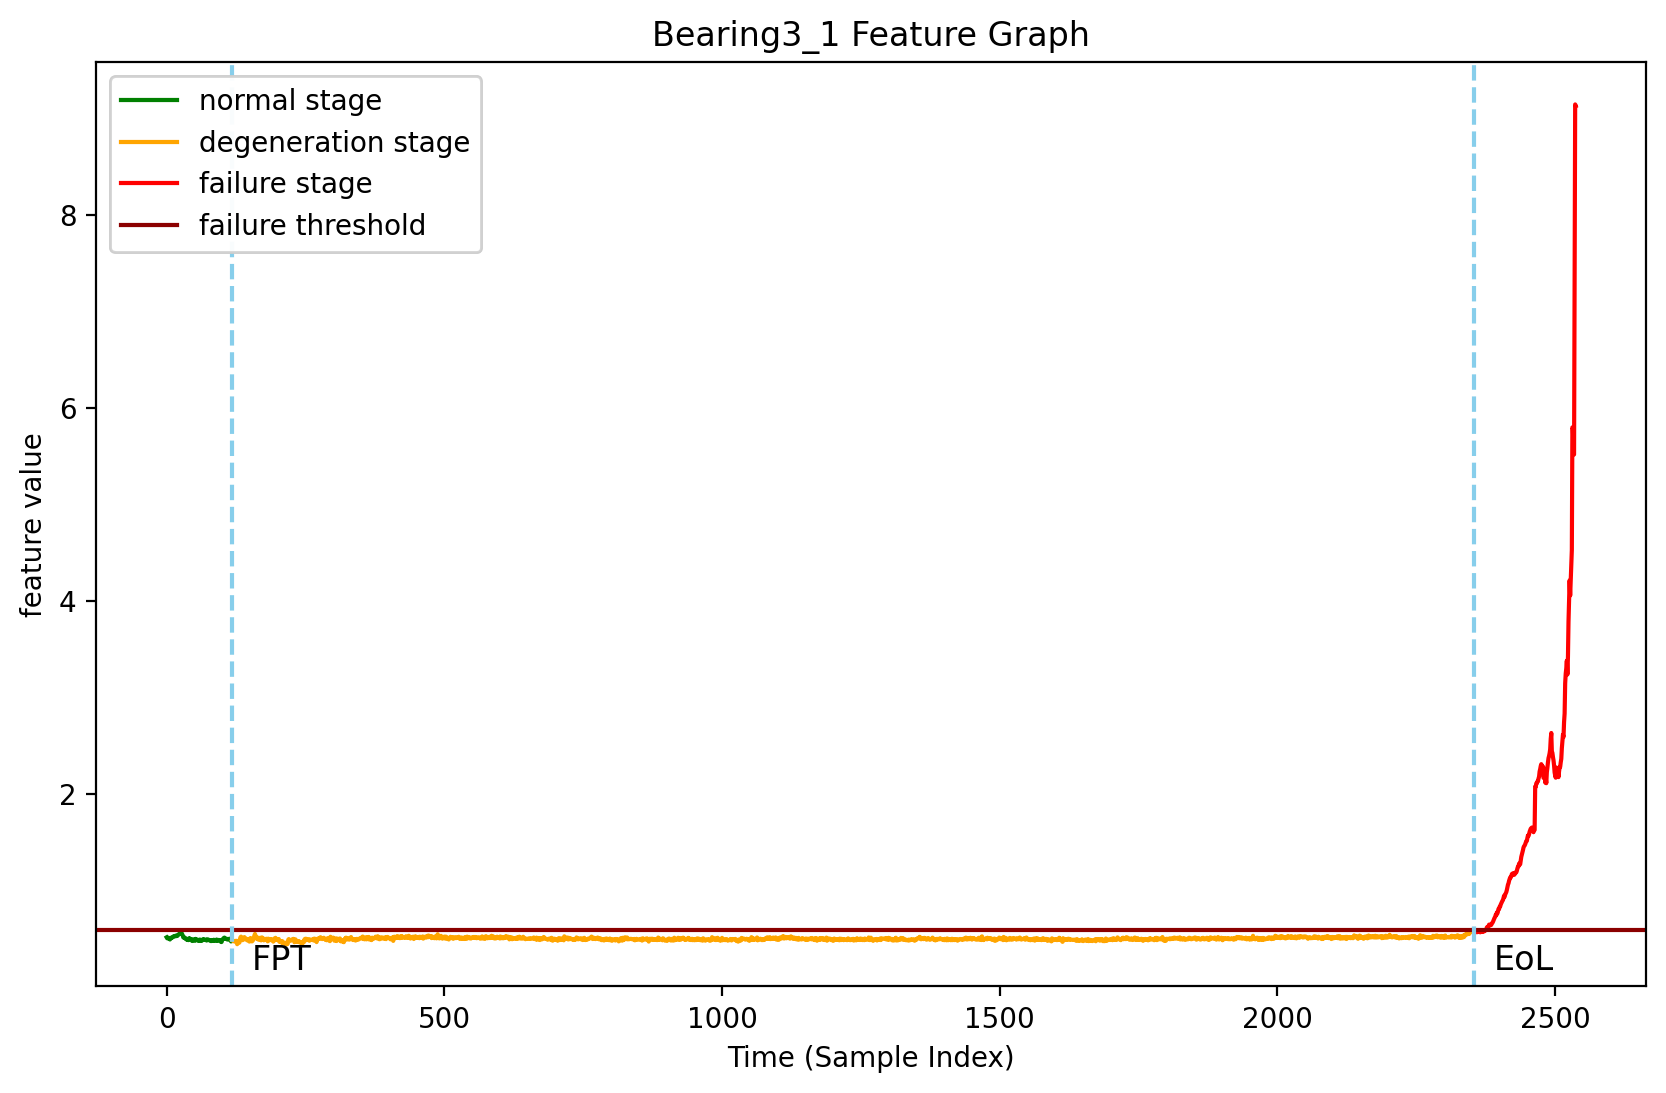

In [17]:
plot("Bearing3_1")

计时时长：40.48 s


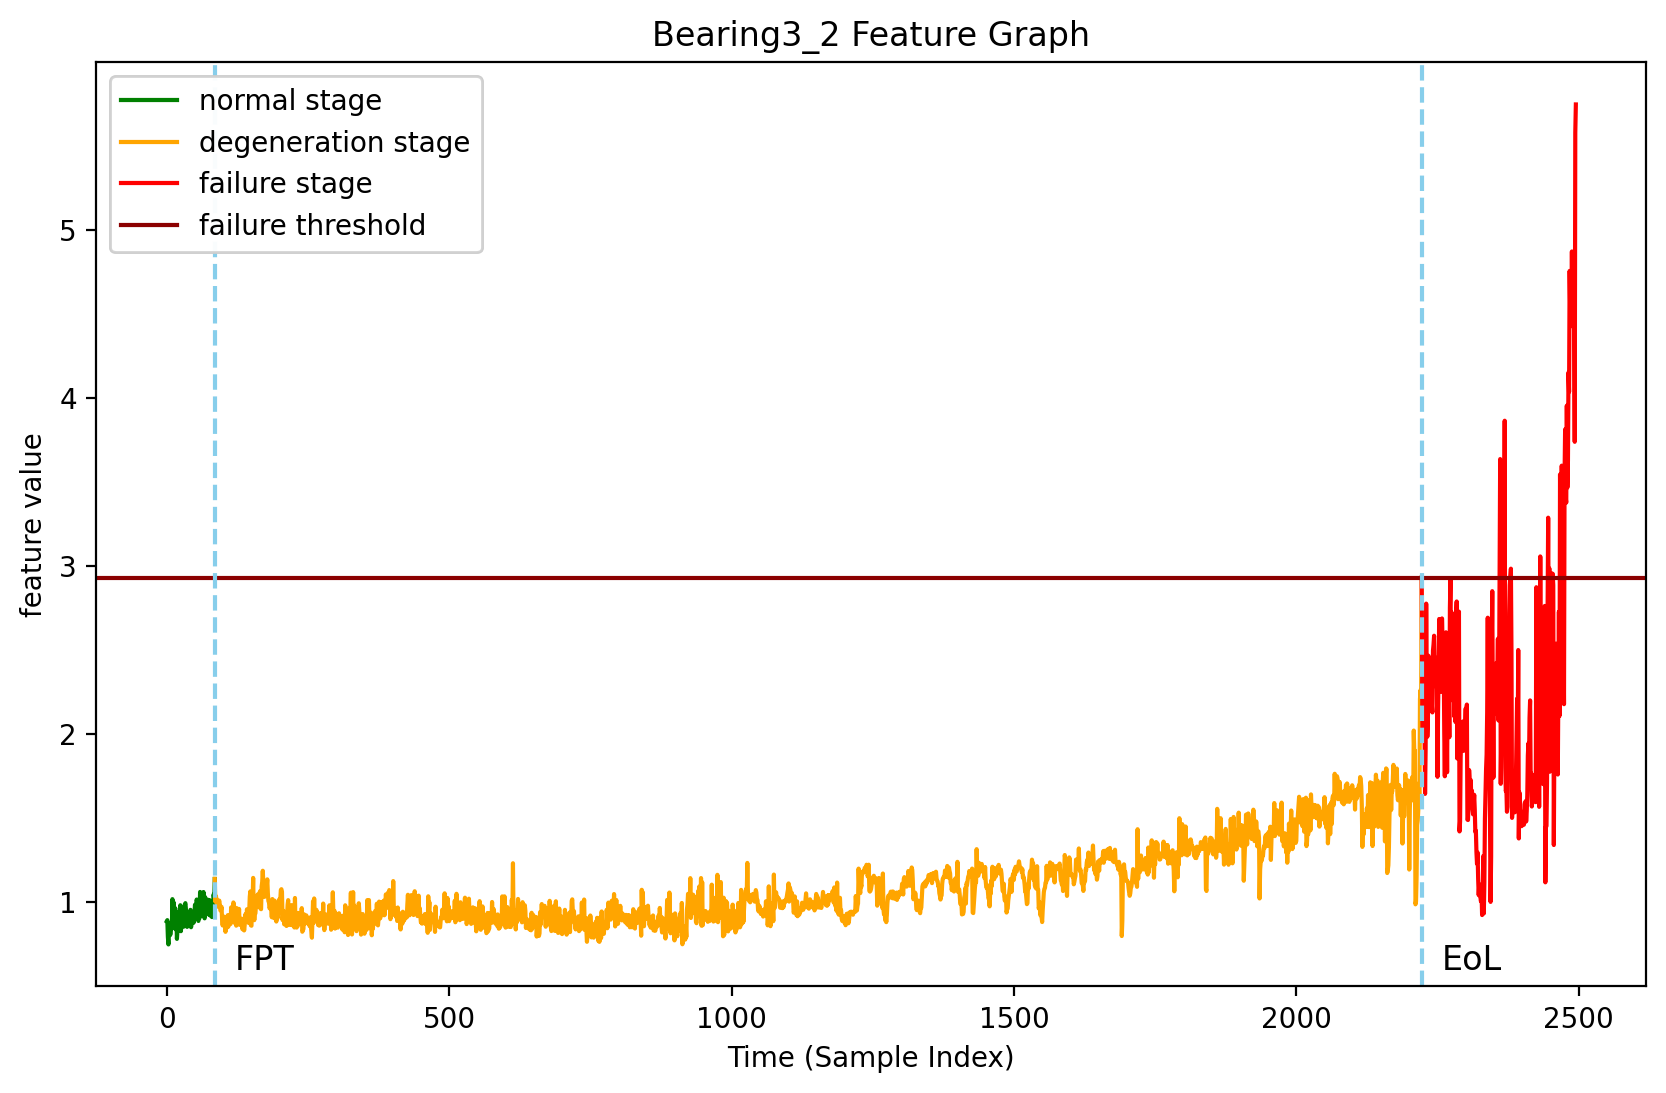

In [18]:
plot("Bearing3_2")

计时时长：4.27 s


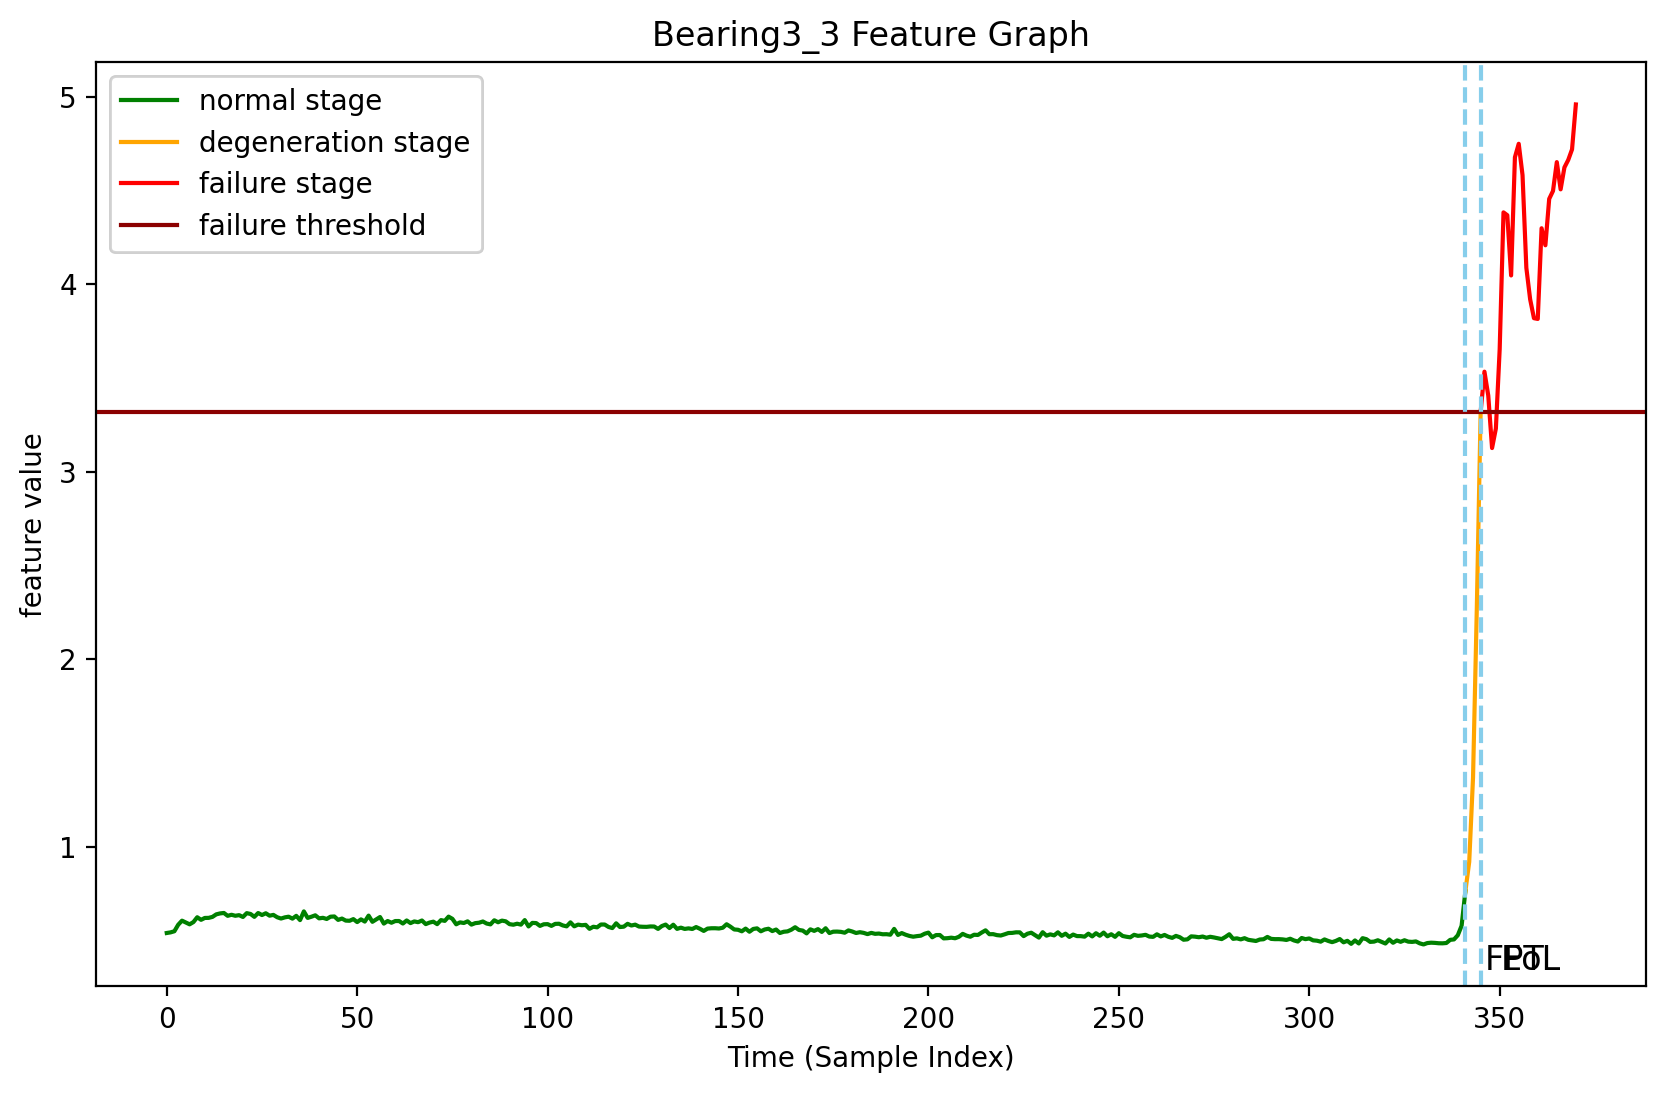

In [19]:
plot("Bearing3_3")

计时时长：17.0 s


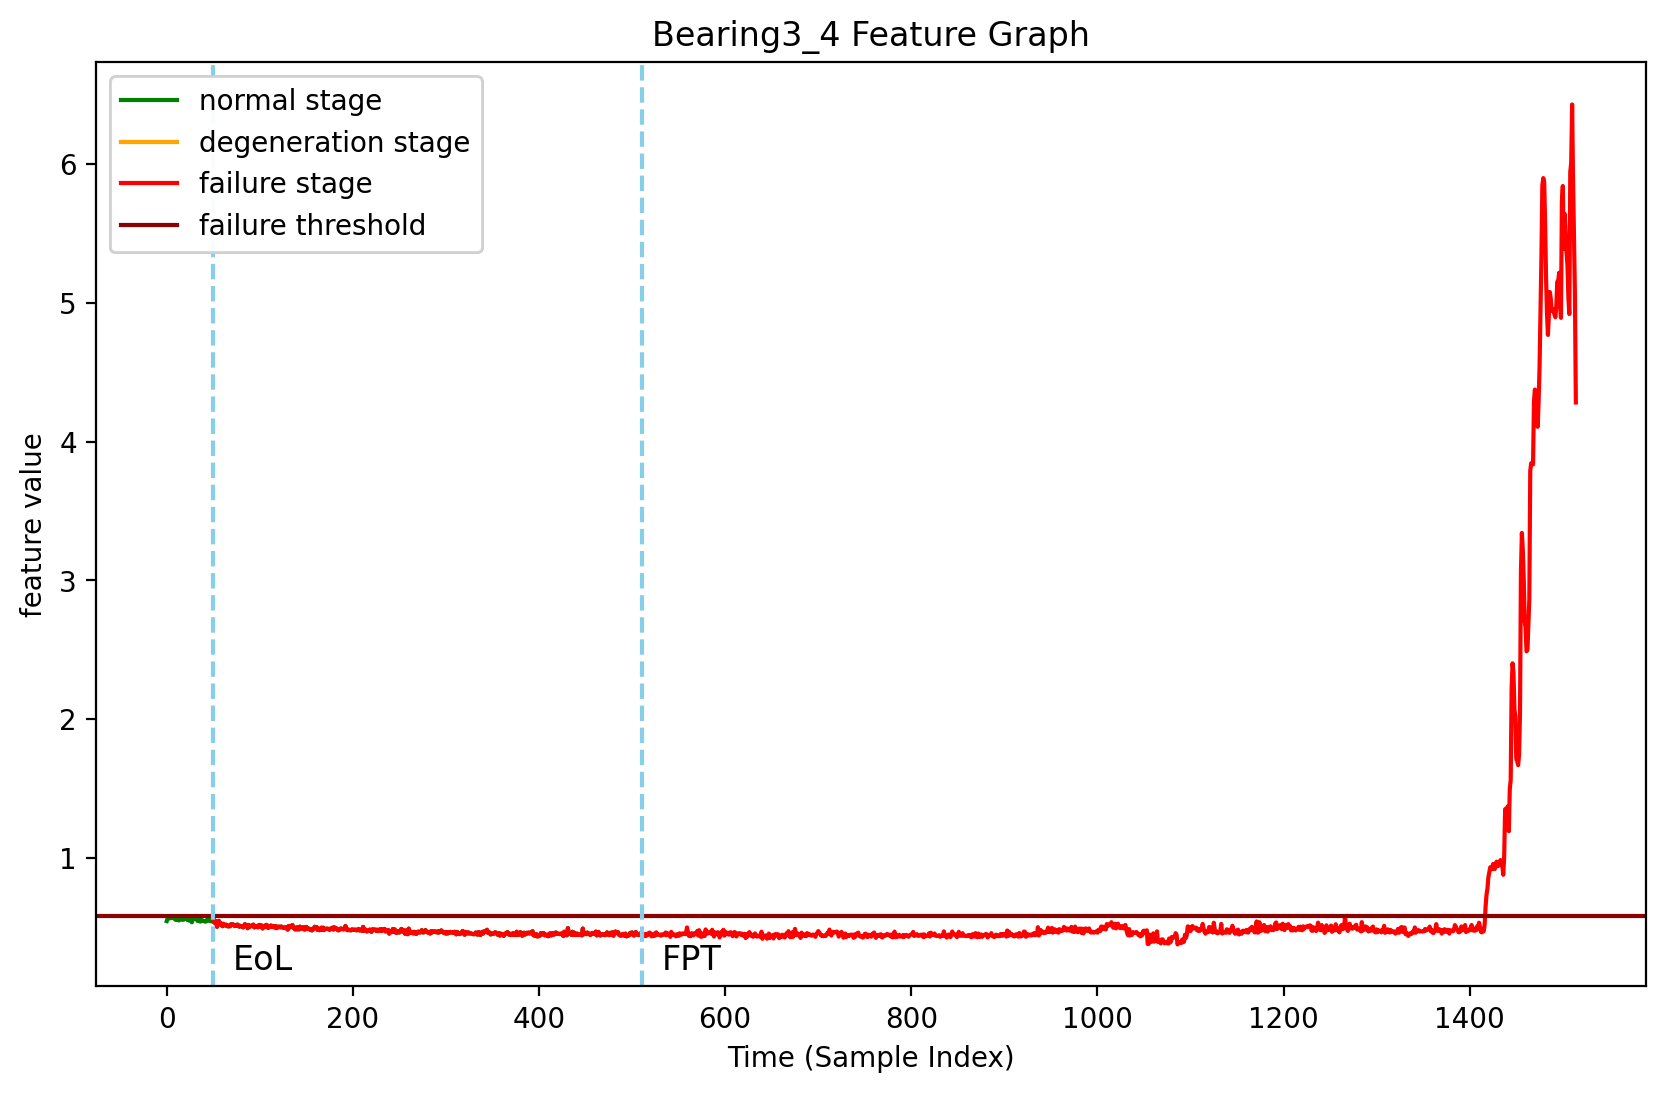

In [20]:
plot("Bearing3_4")

计时时长：1.3 s


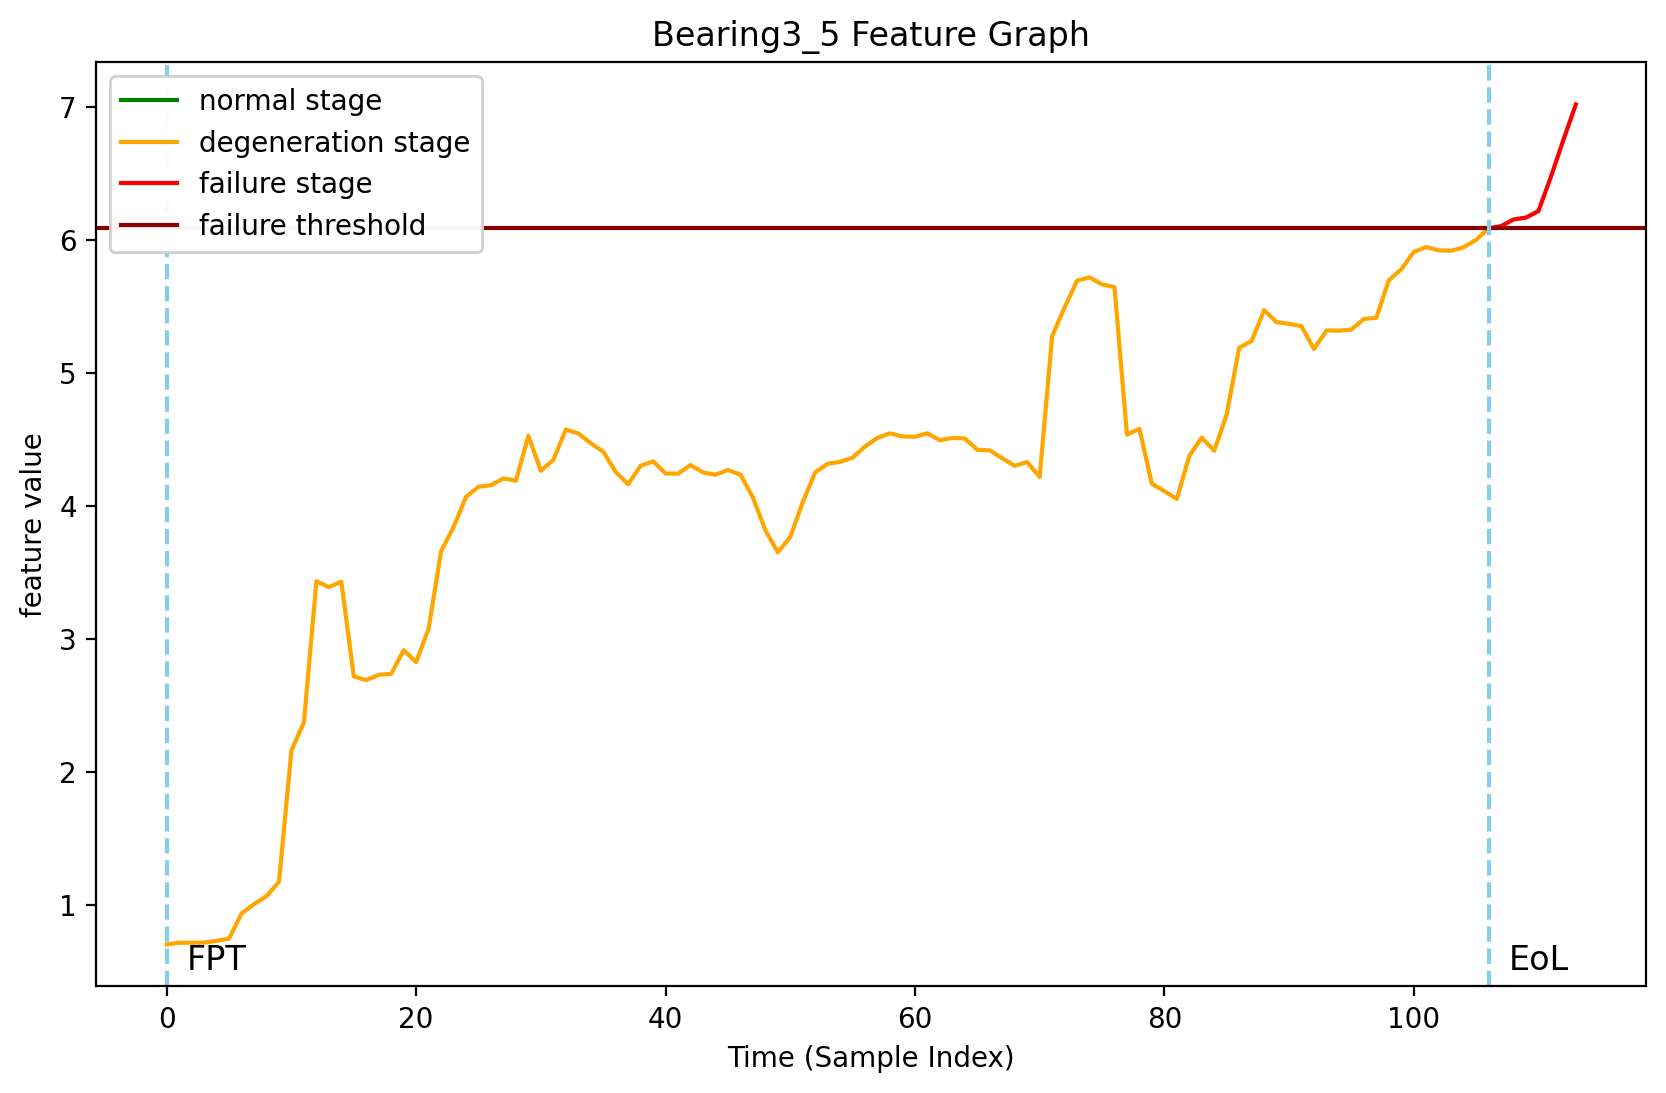

In [21]:
plot("Bearing3_5")

## ⭐ 生成PHM数据集所有轴承特征图

In [22]:
data_loader = PHM2012DataLoader('D:\\data\\dataset\\phm-ieee-2012-data-challenge-dataset-master')
feature_extractor.continuum = data_loader.continuum
stage_calculator.scale = data_loader.continuum

DEBUG - 15:39:33 >> 
<<<< 数据集位置：D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master >>>>
>> 已成功登记以下数据项：
  Bearing1_1，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_1
  Bearing1_2，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_2
  Bearing2_1，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_1
  Bearing2_2，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_2
  Bearing3_1，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_1
  Bearing3_2，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_2
  Bearing1_3，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Full_Test_Set\Bearing1_3
  Bearing1_4，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Full_Test_Set\Bearing1_4
  Bearing1_5，位置: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\F

计时时长：5.25 s


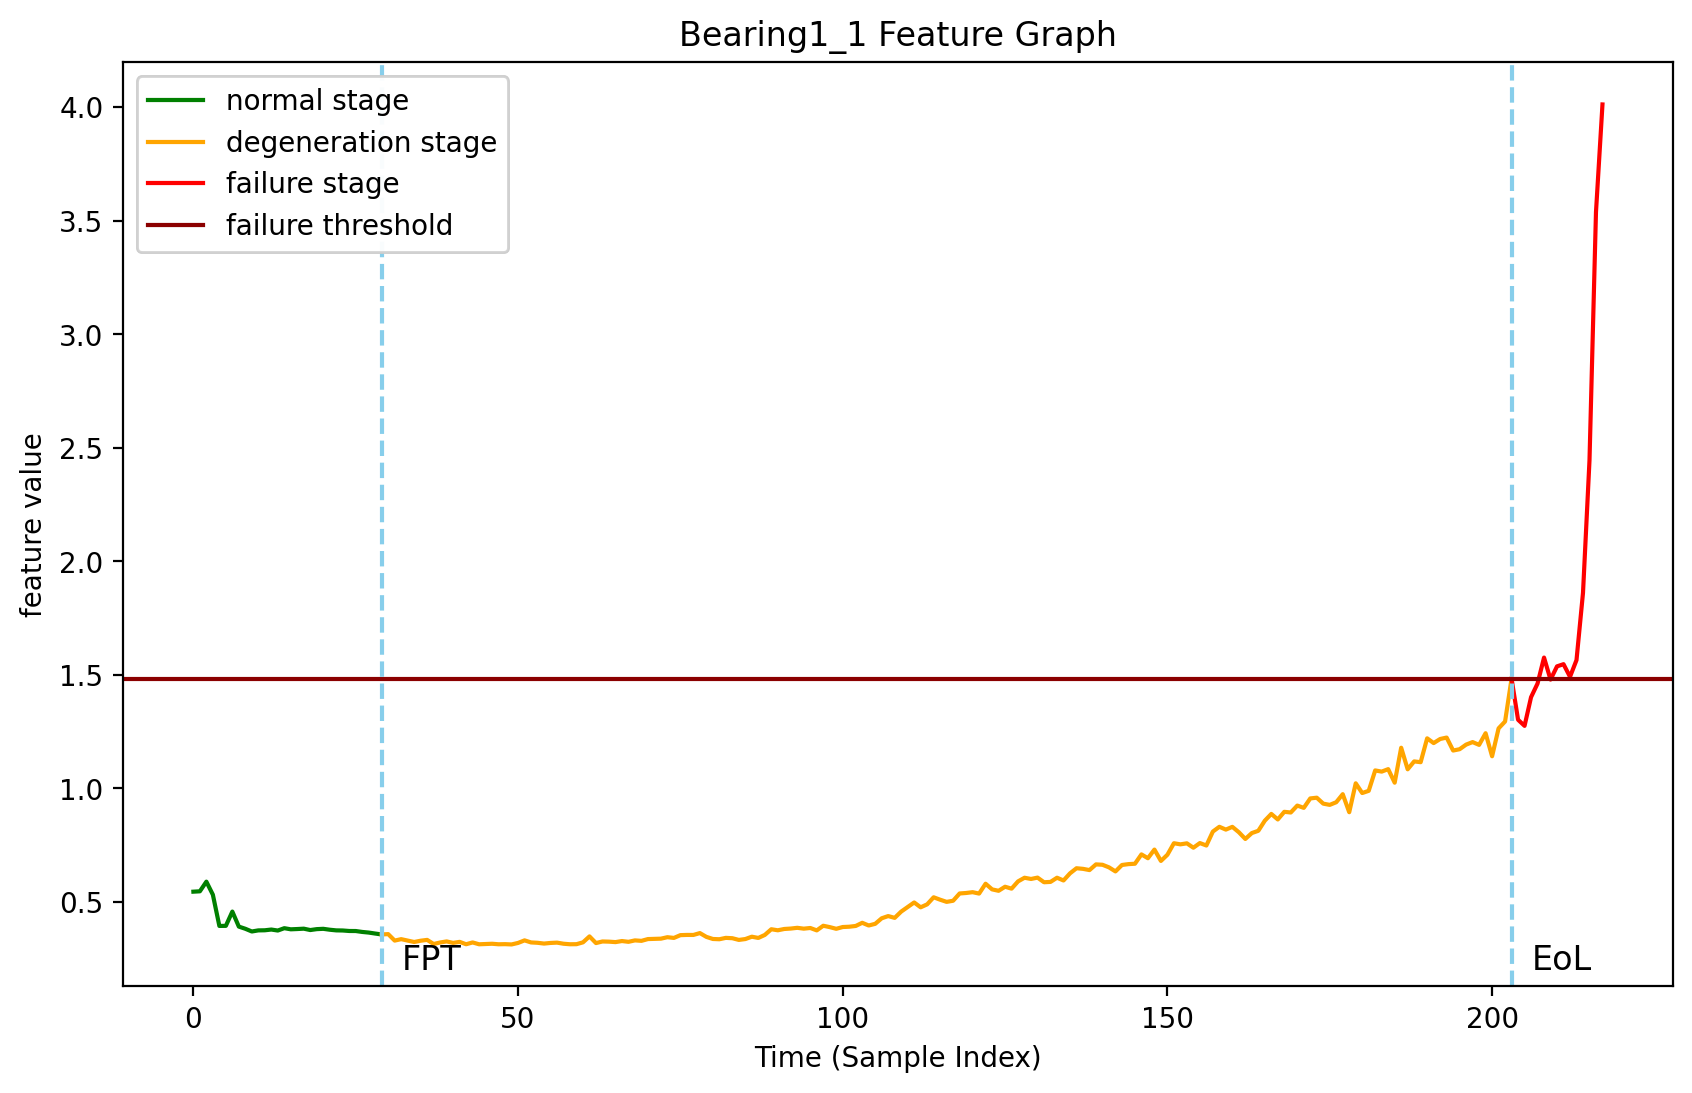

In [23]:
plot("Bearing1_1")

计时时长：1.75 s


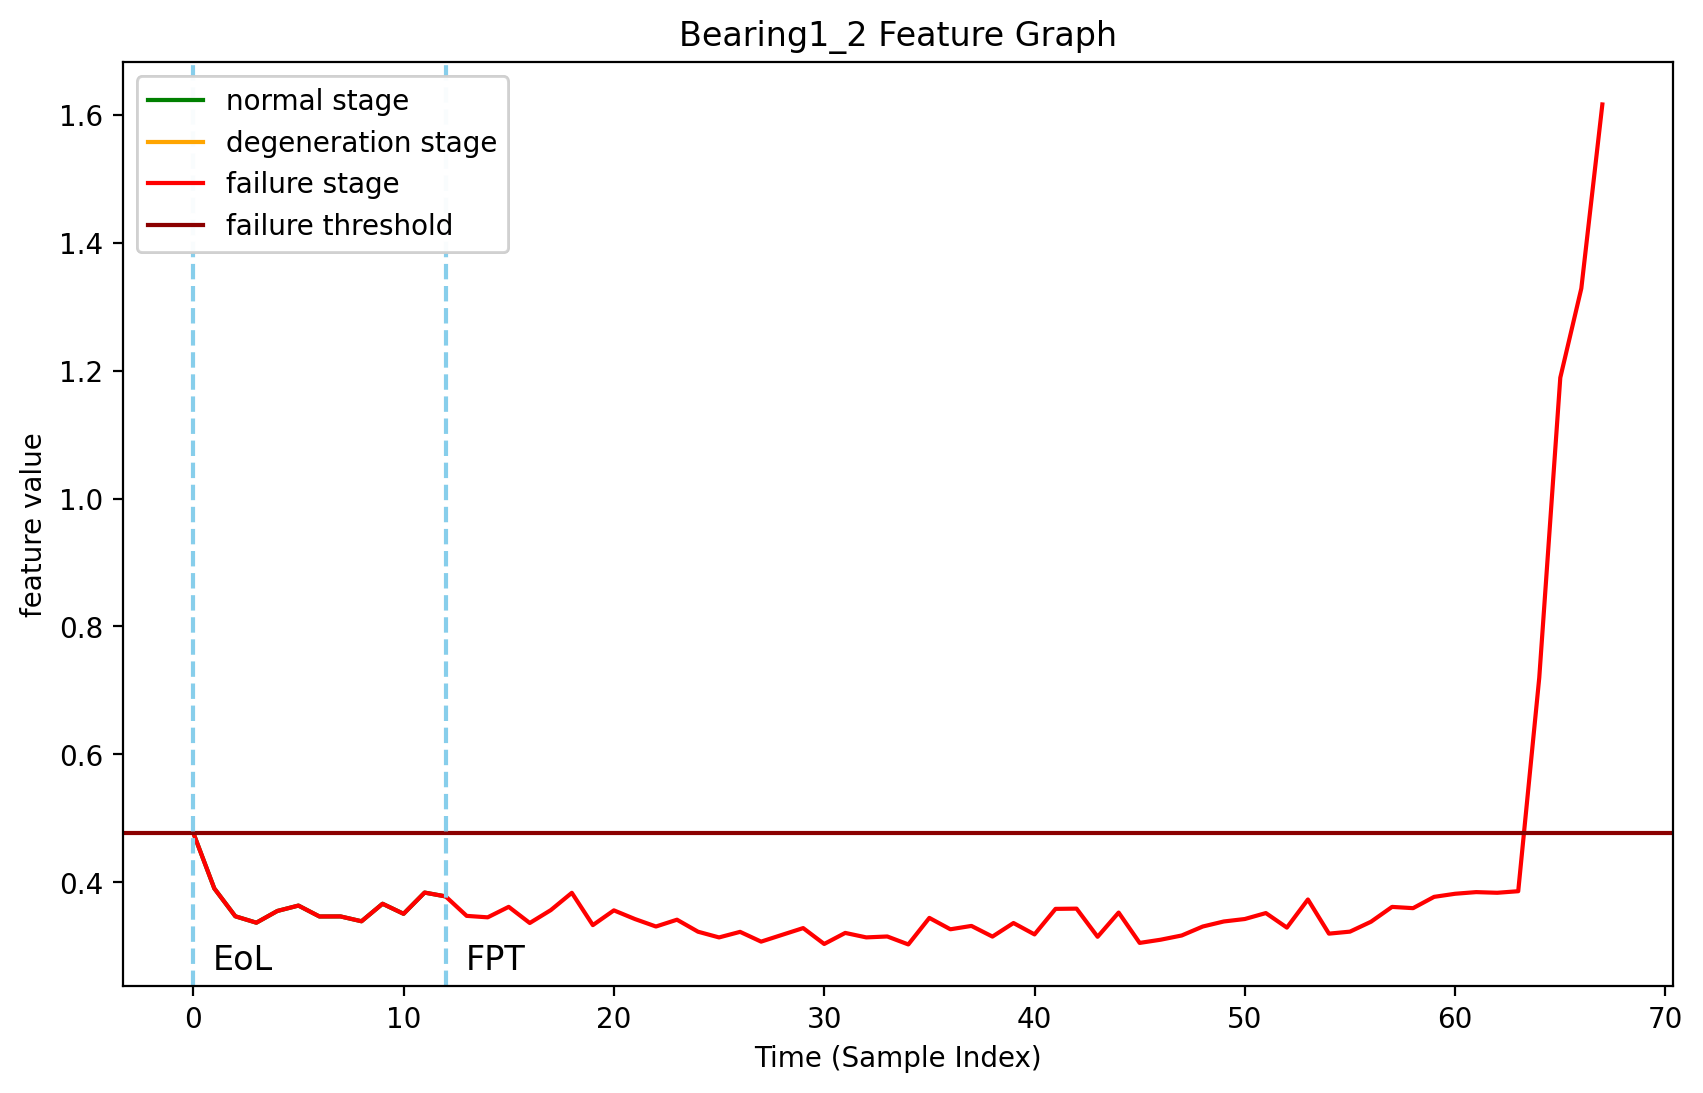

In [24]:
plot("Bearing1_2")

计时时长：4.4 s


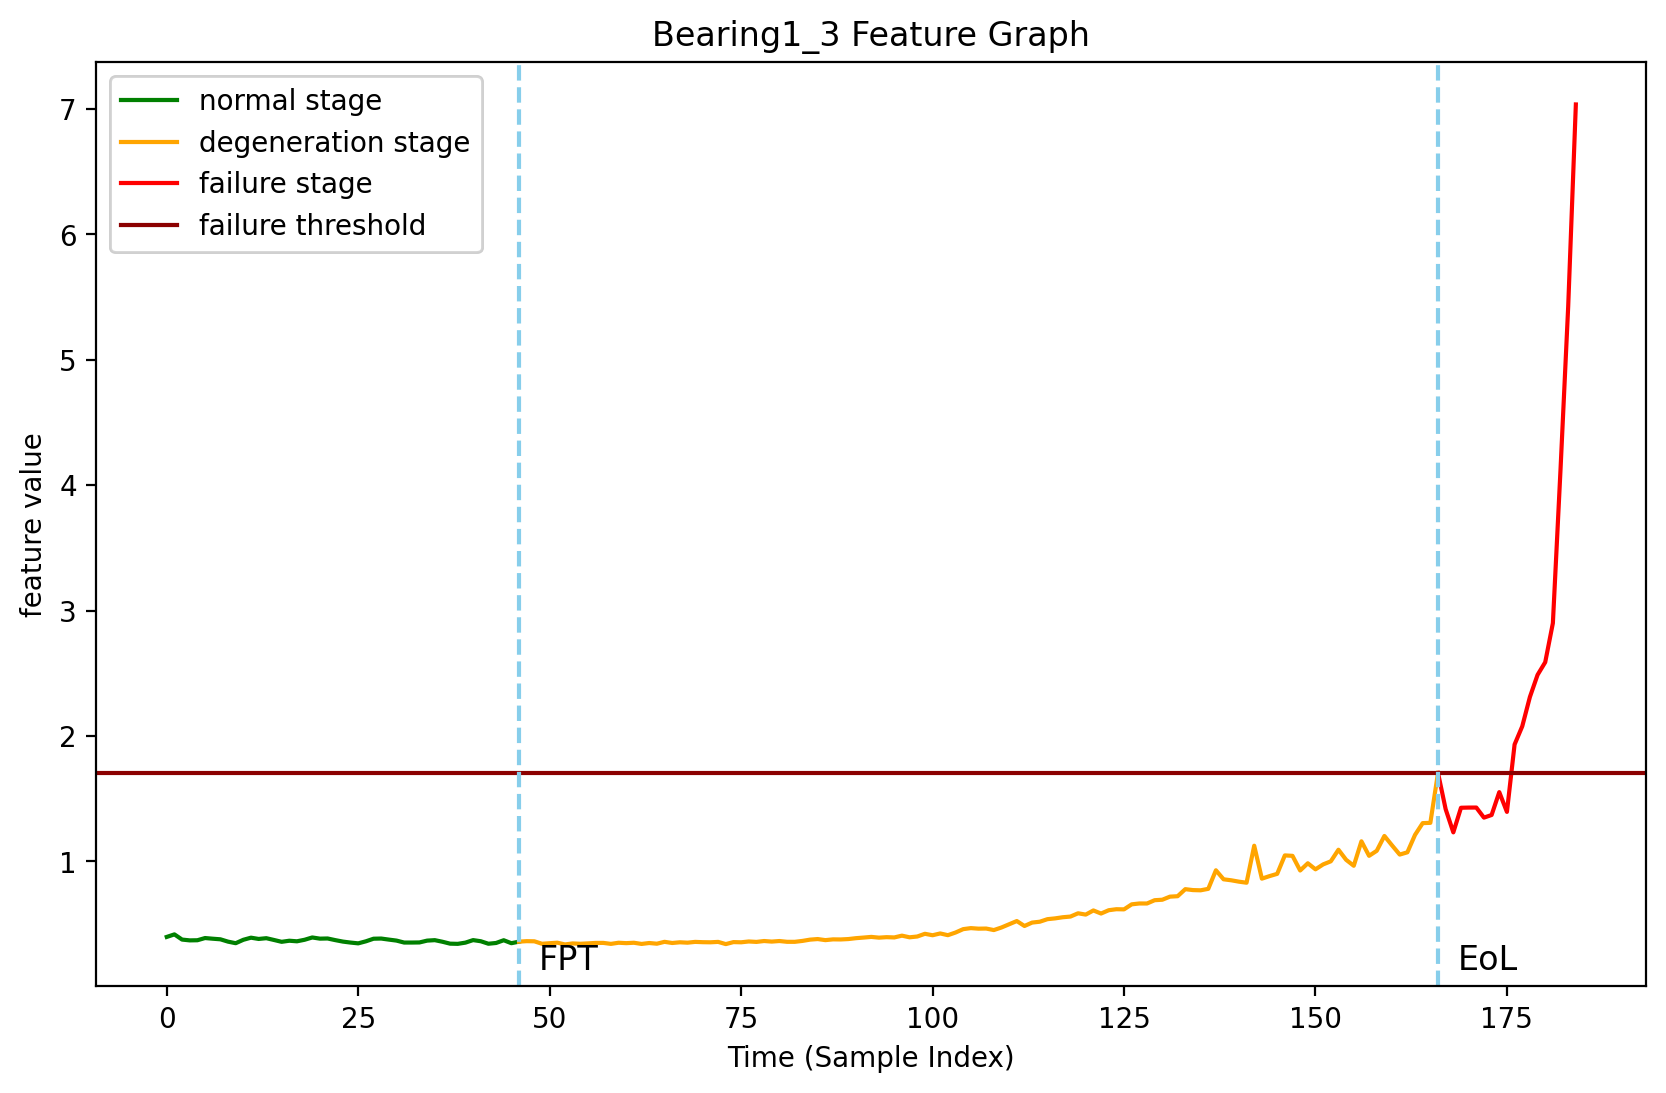

In [25]:
plot("Bearing1_3")

计时时长：2.76 s


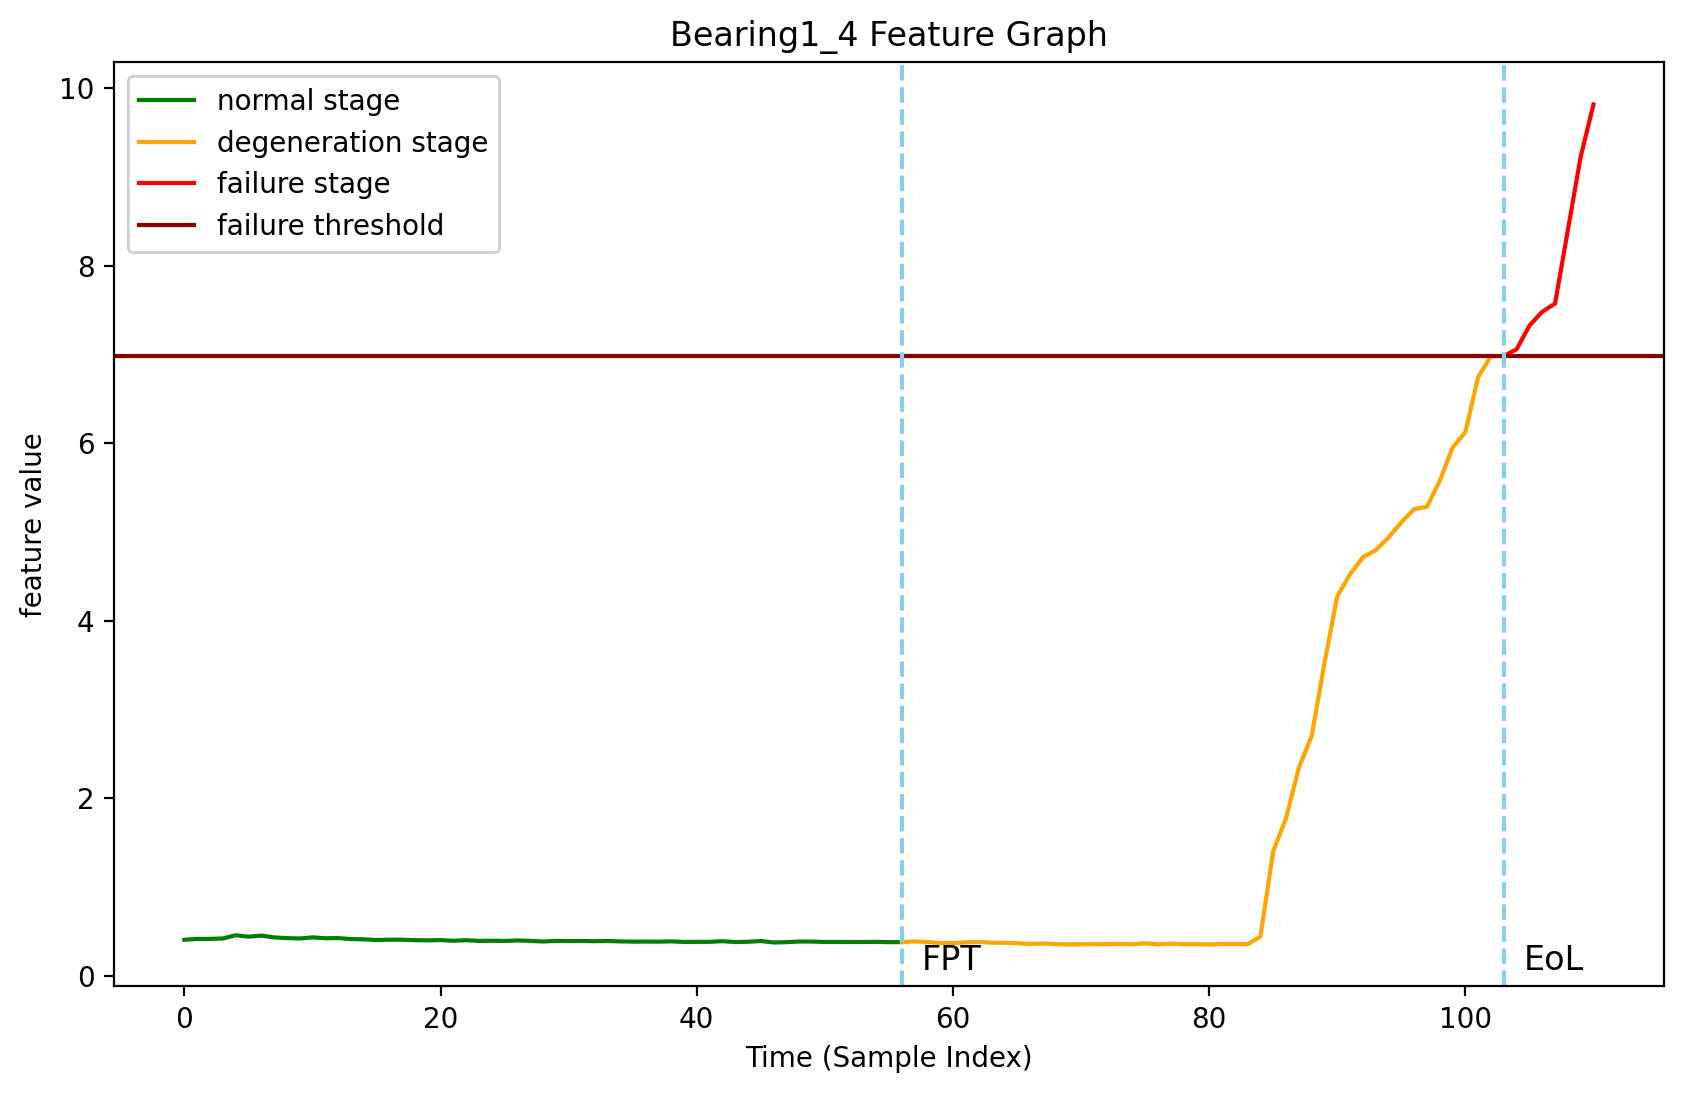

In [26]:
plot("Bearing1_4")

计时时长：4.48 s


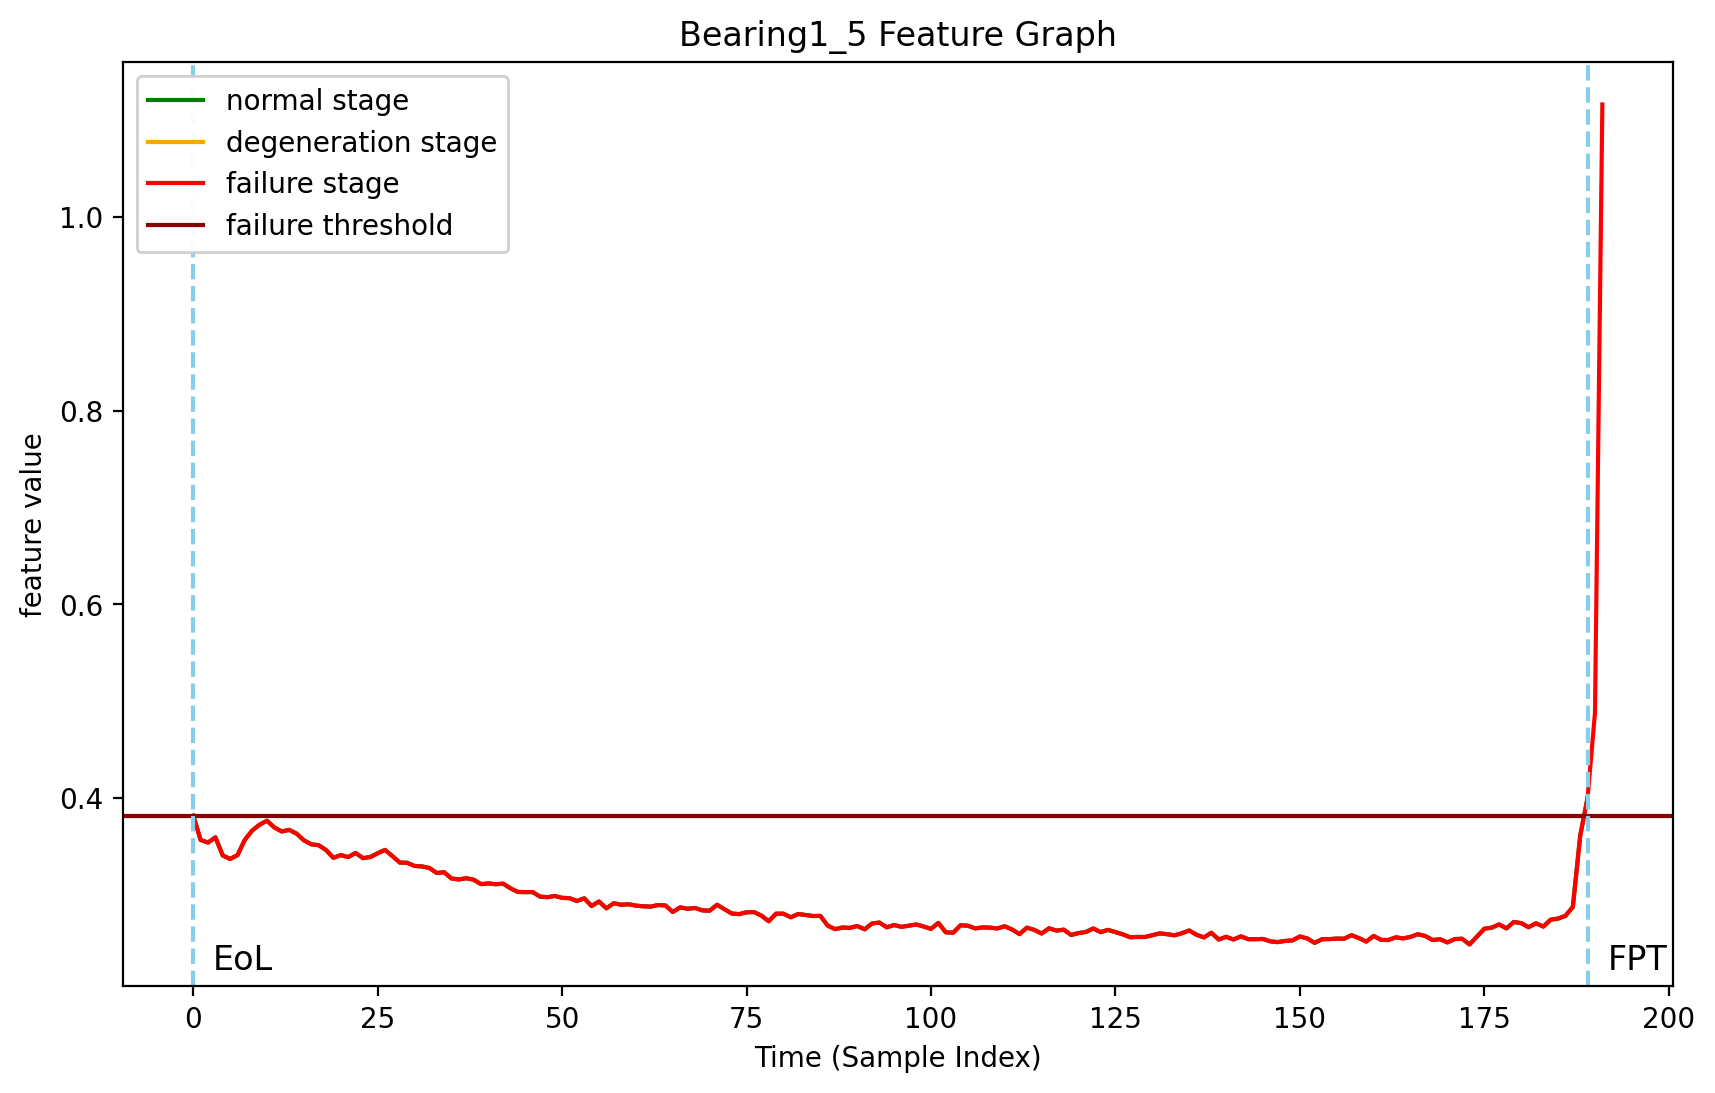

In [27]:
plot("Bearing1_5")

计时时长：4.38 s


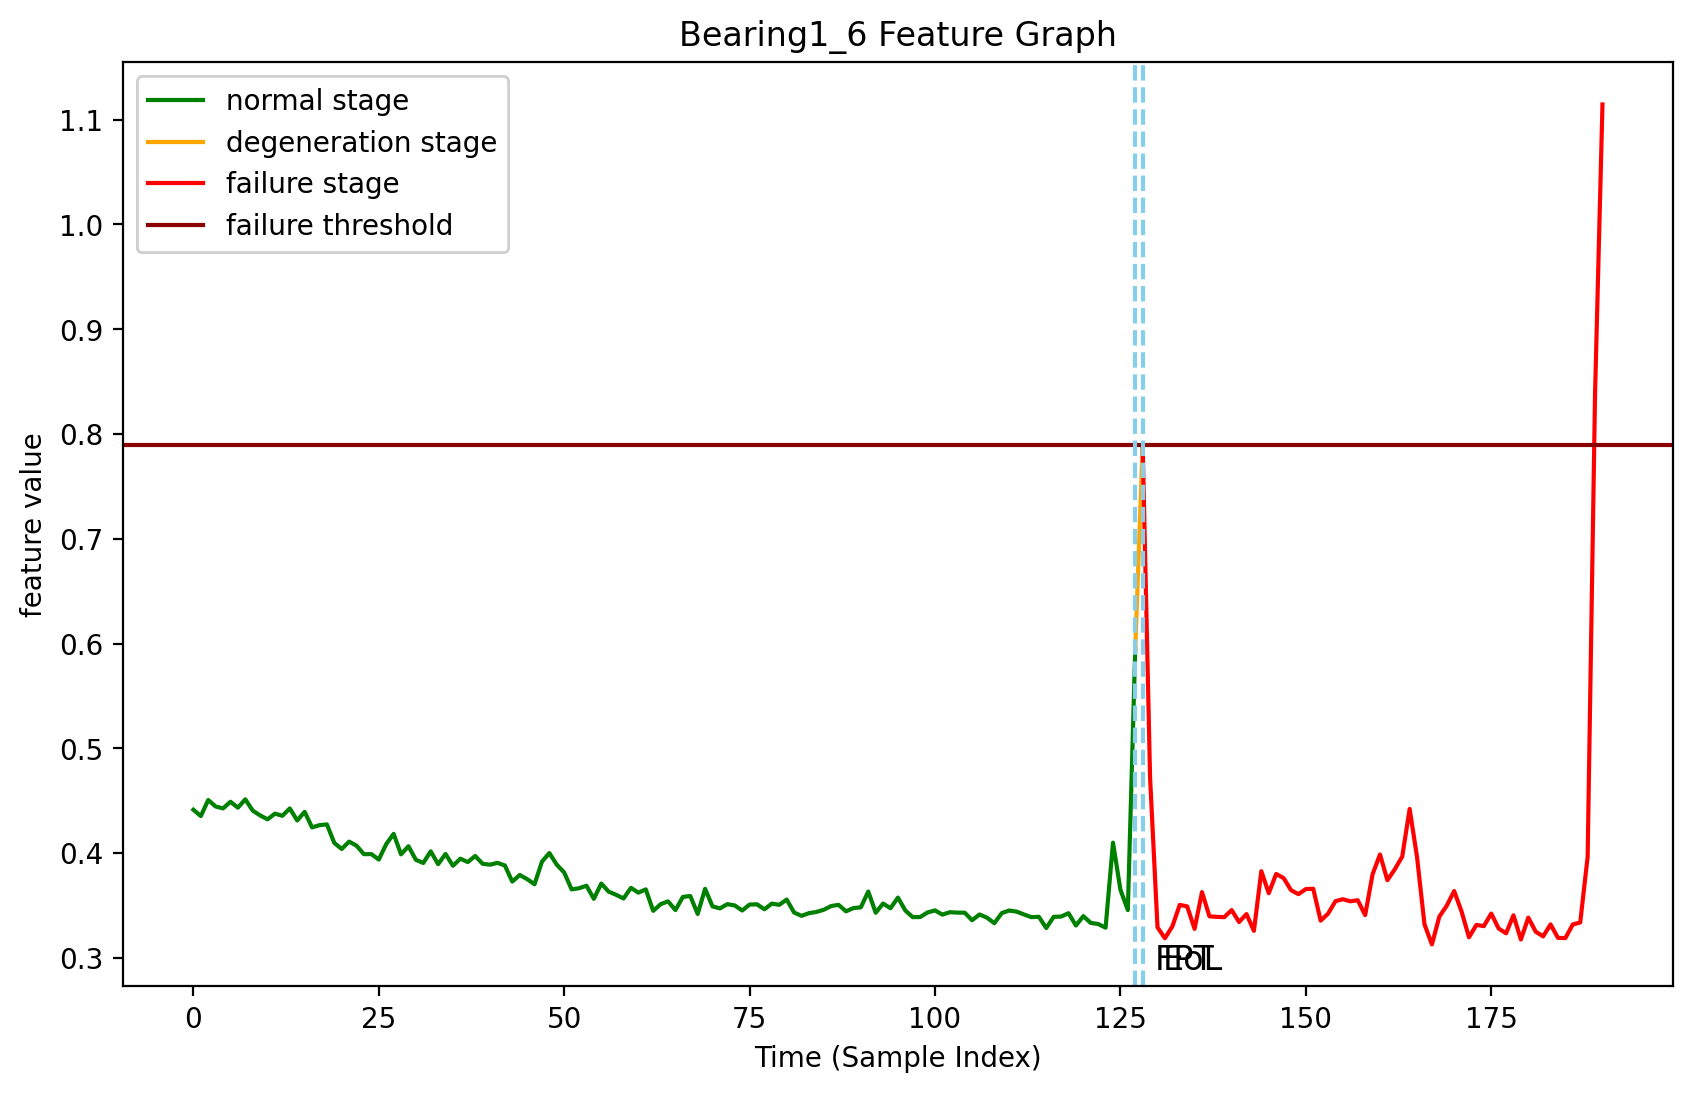

In [28]:
plot("Bearing1_6")

计时时长：4.06 s


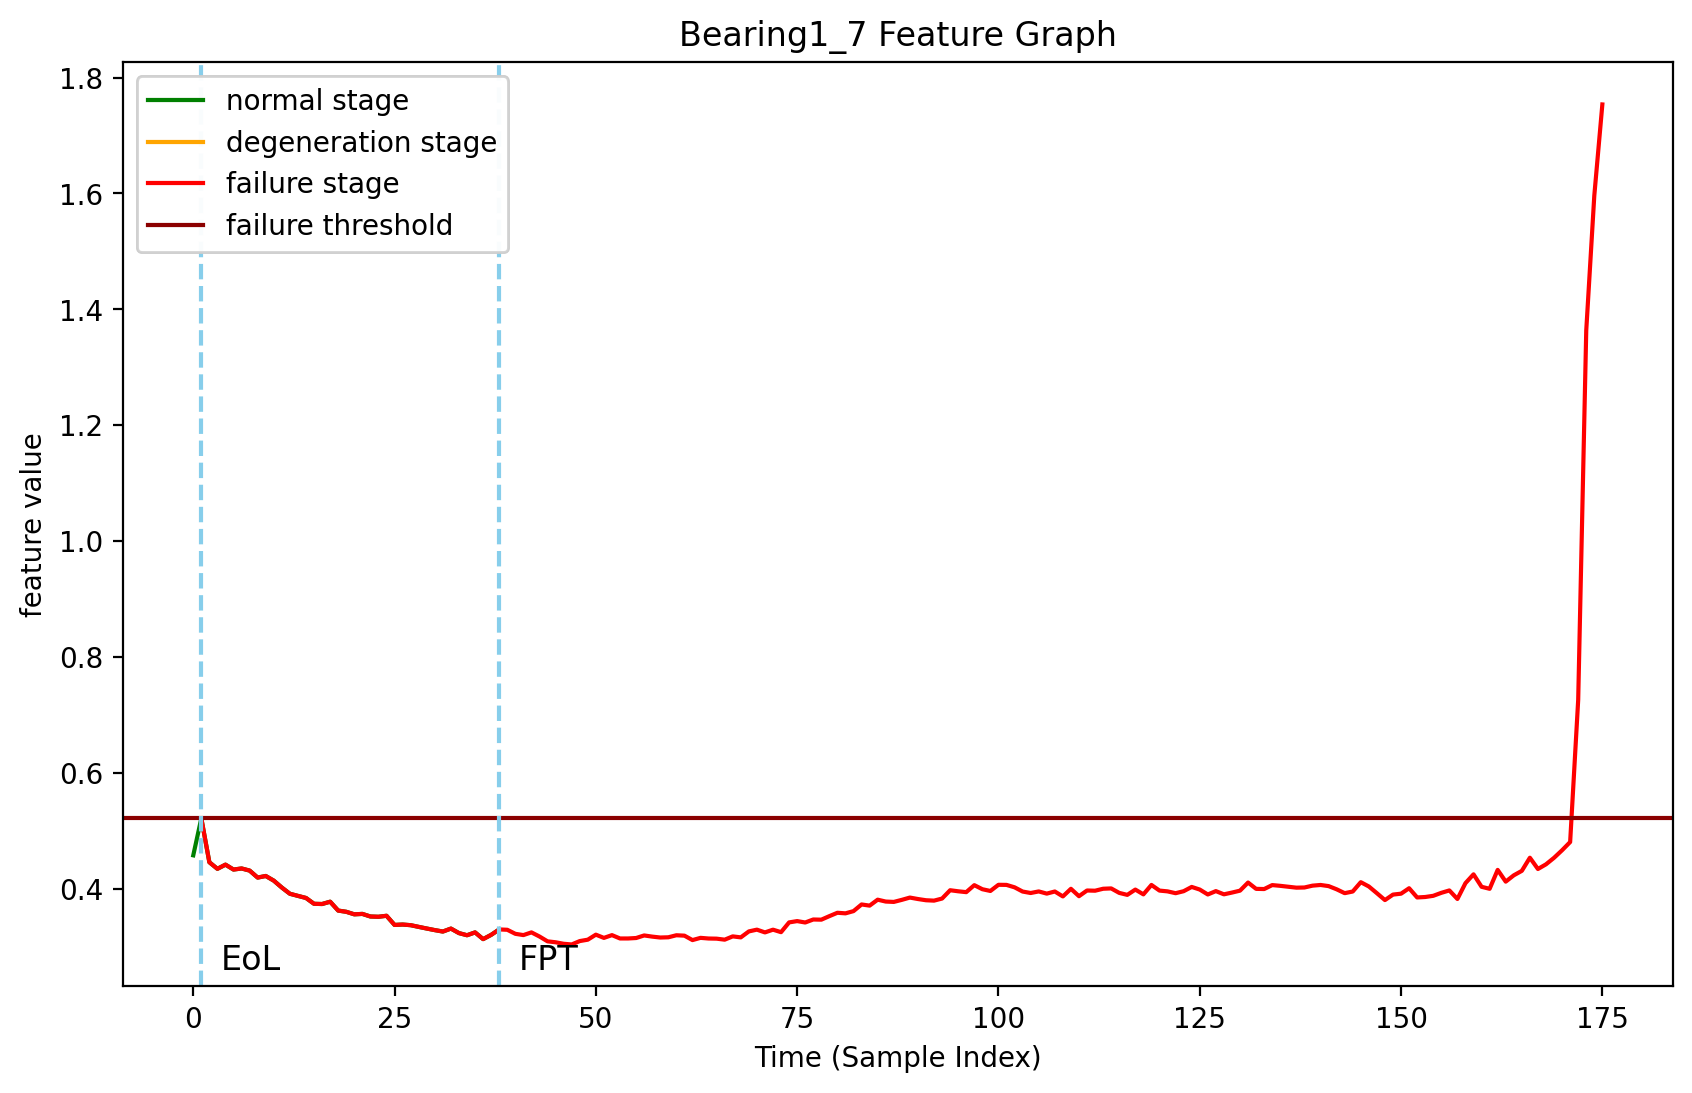

In [29]:
plot("Bearing1_7")

计时时长：1.87 s


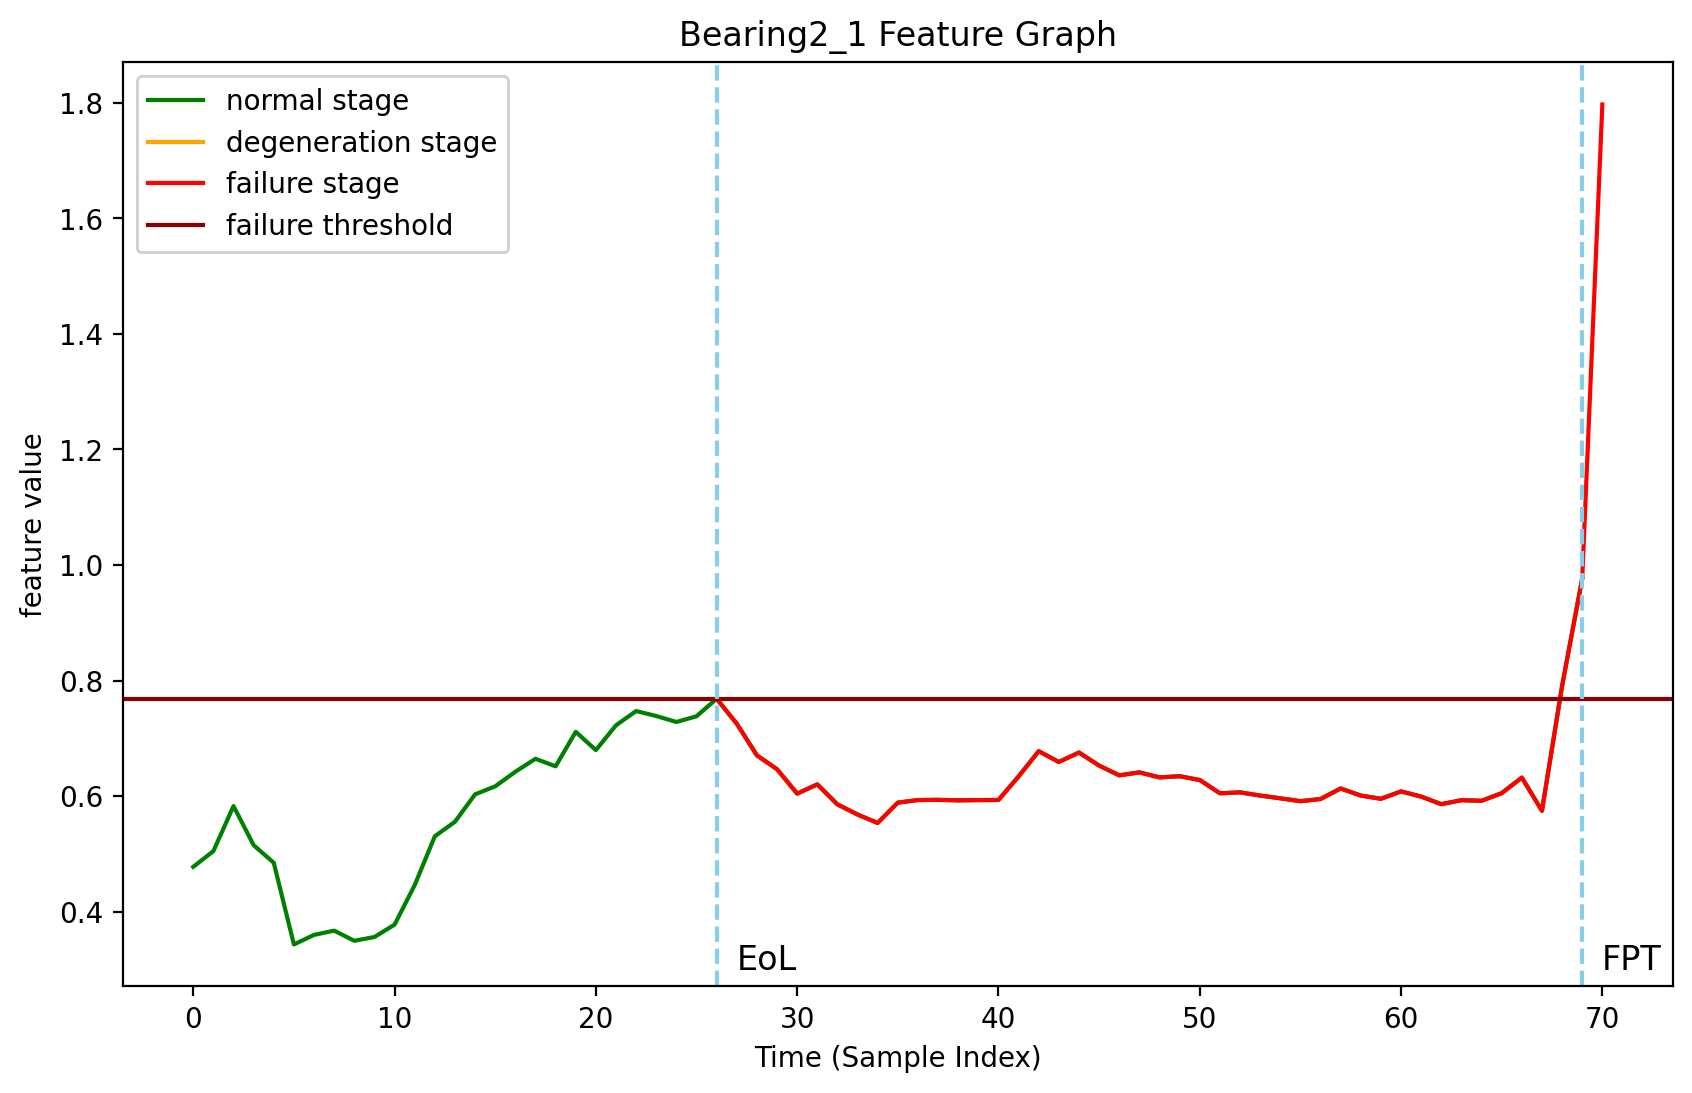

In [30]:
plot("Bearing2_1")

计时时长：1.55 s


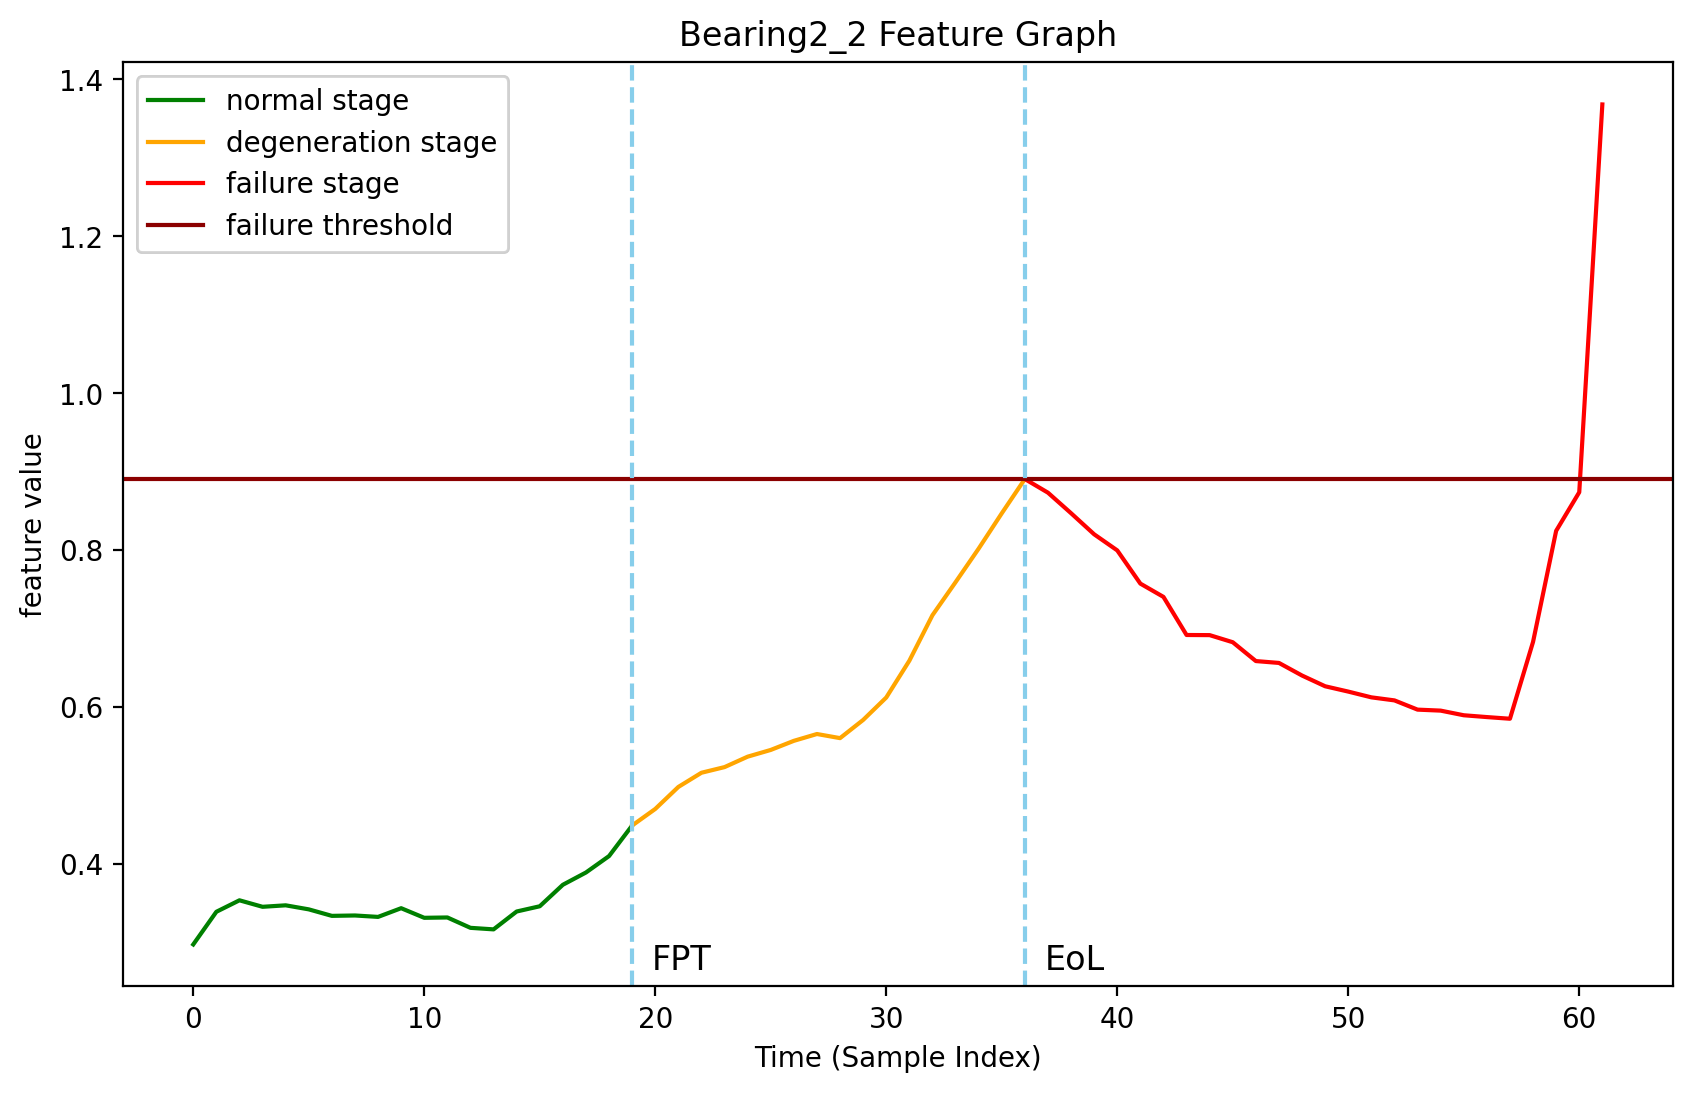

In [31]:
plot("Bearing2_2")

计时时长：3.64 s


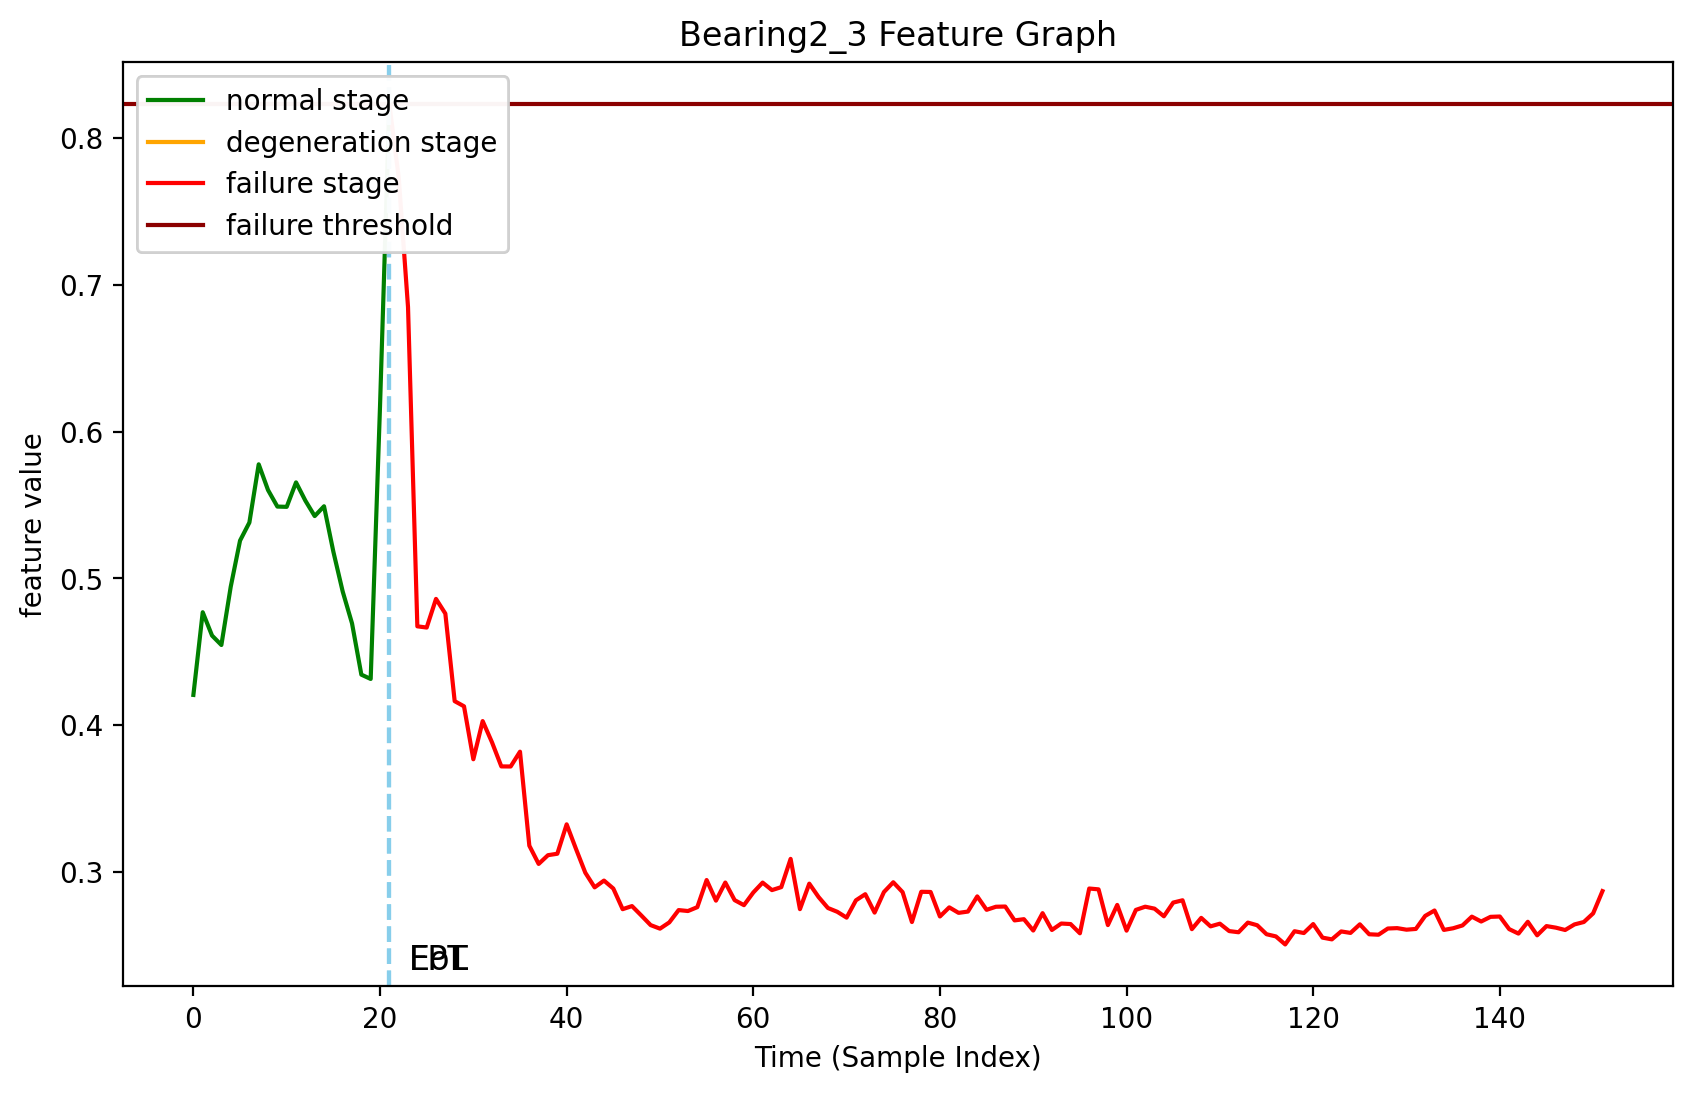

In [32]:
plot("Bearing2_3")

计时时长：1.54 s


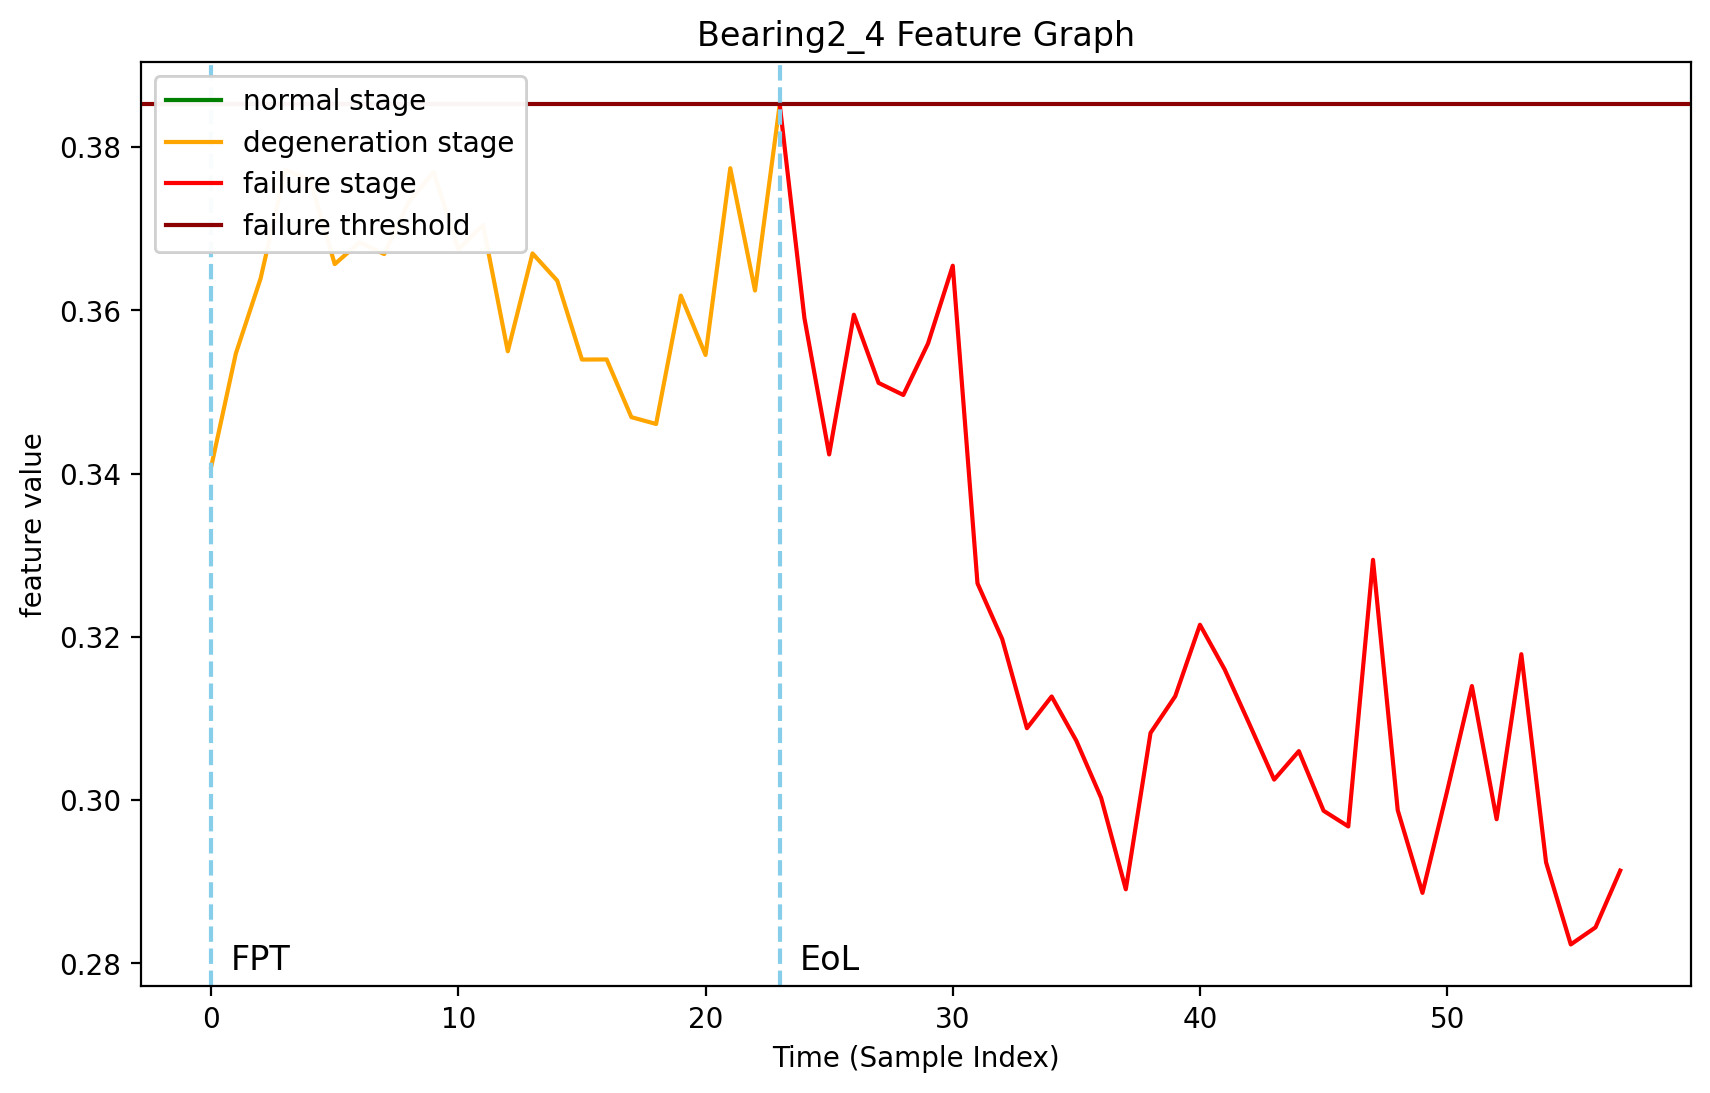

In [33]:
plot("Bearing2_4")

计时时长：4.28 s


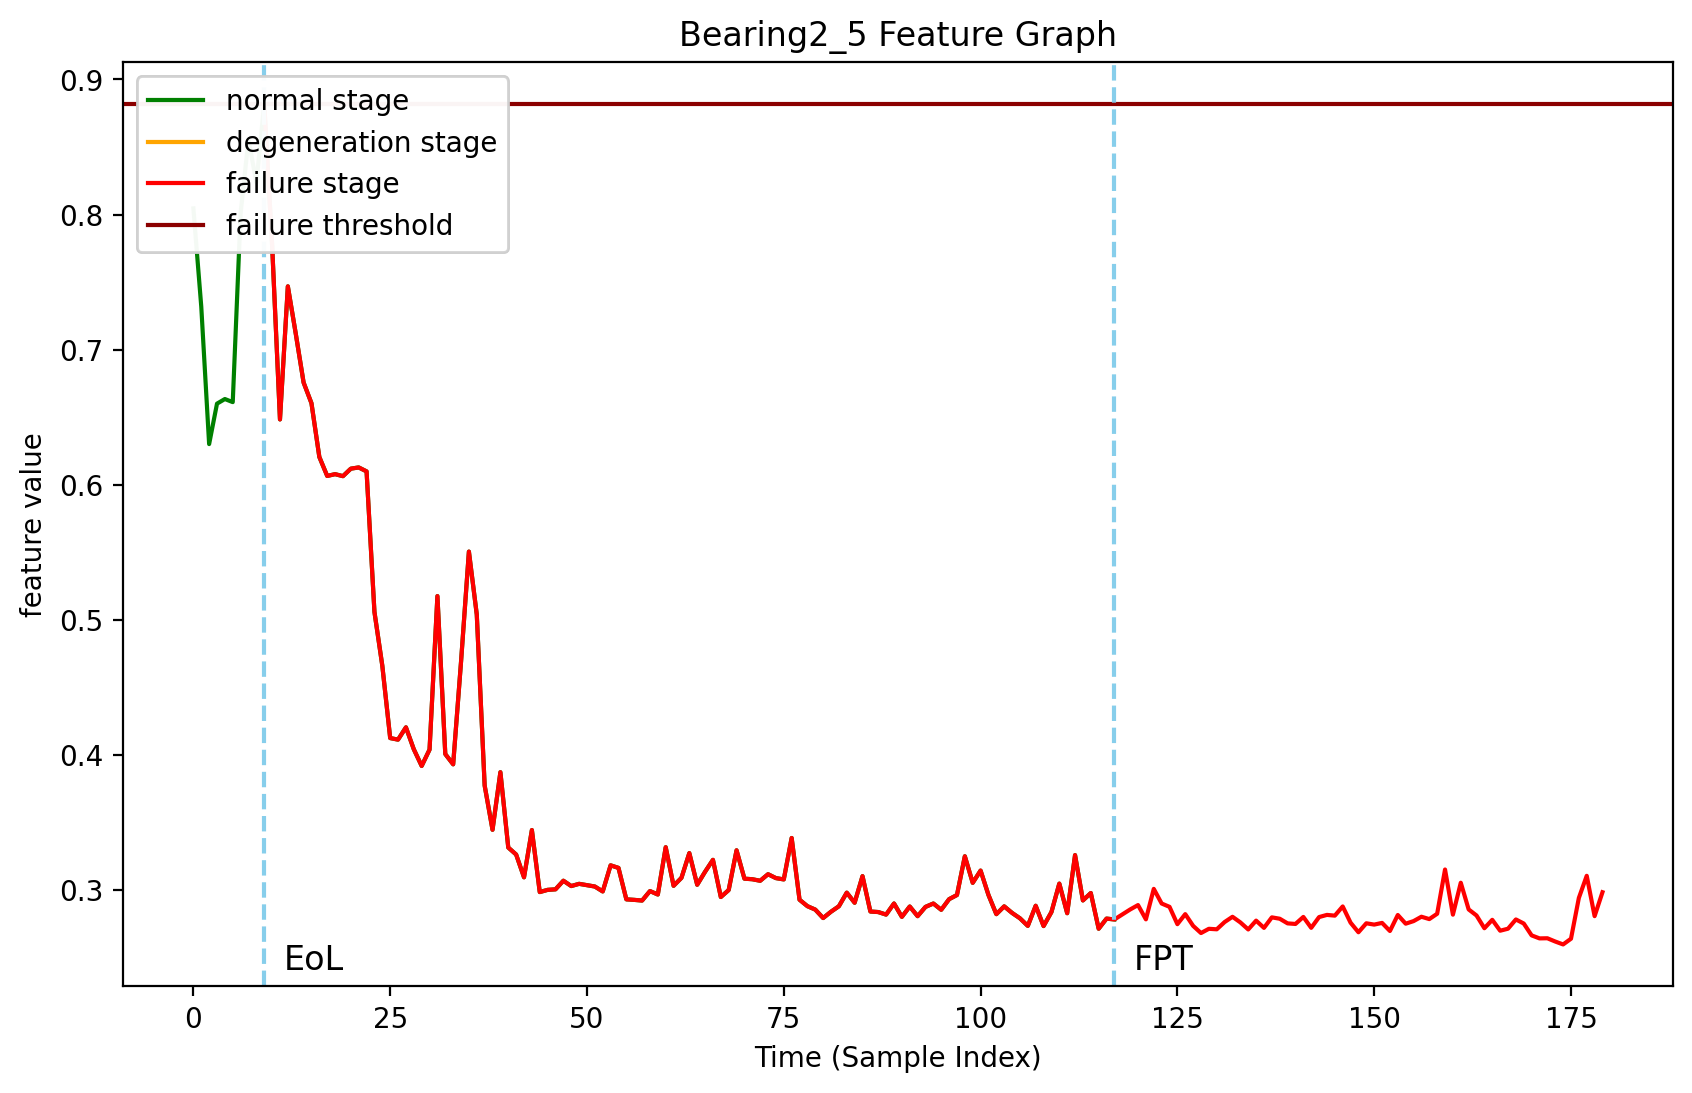

In [34]:
plot("Bearing2_5")

计时时长：1.52 s


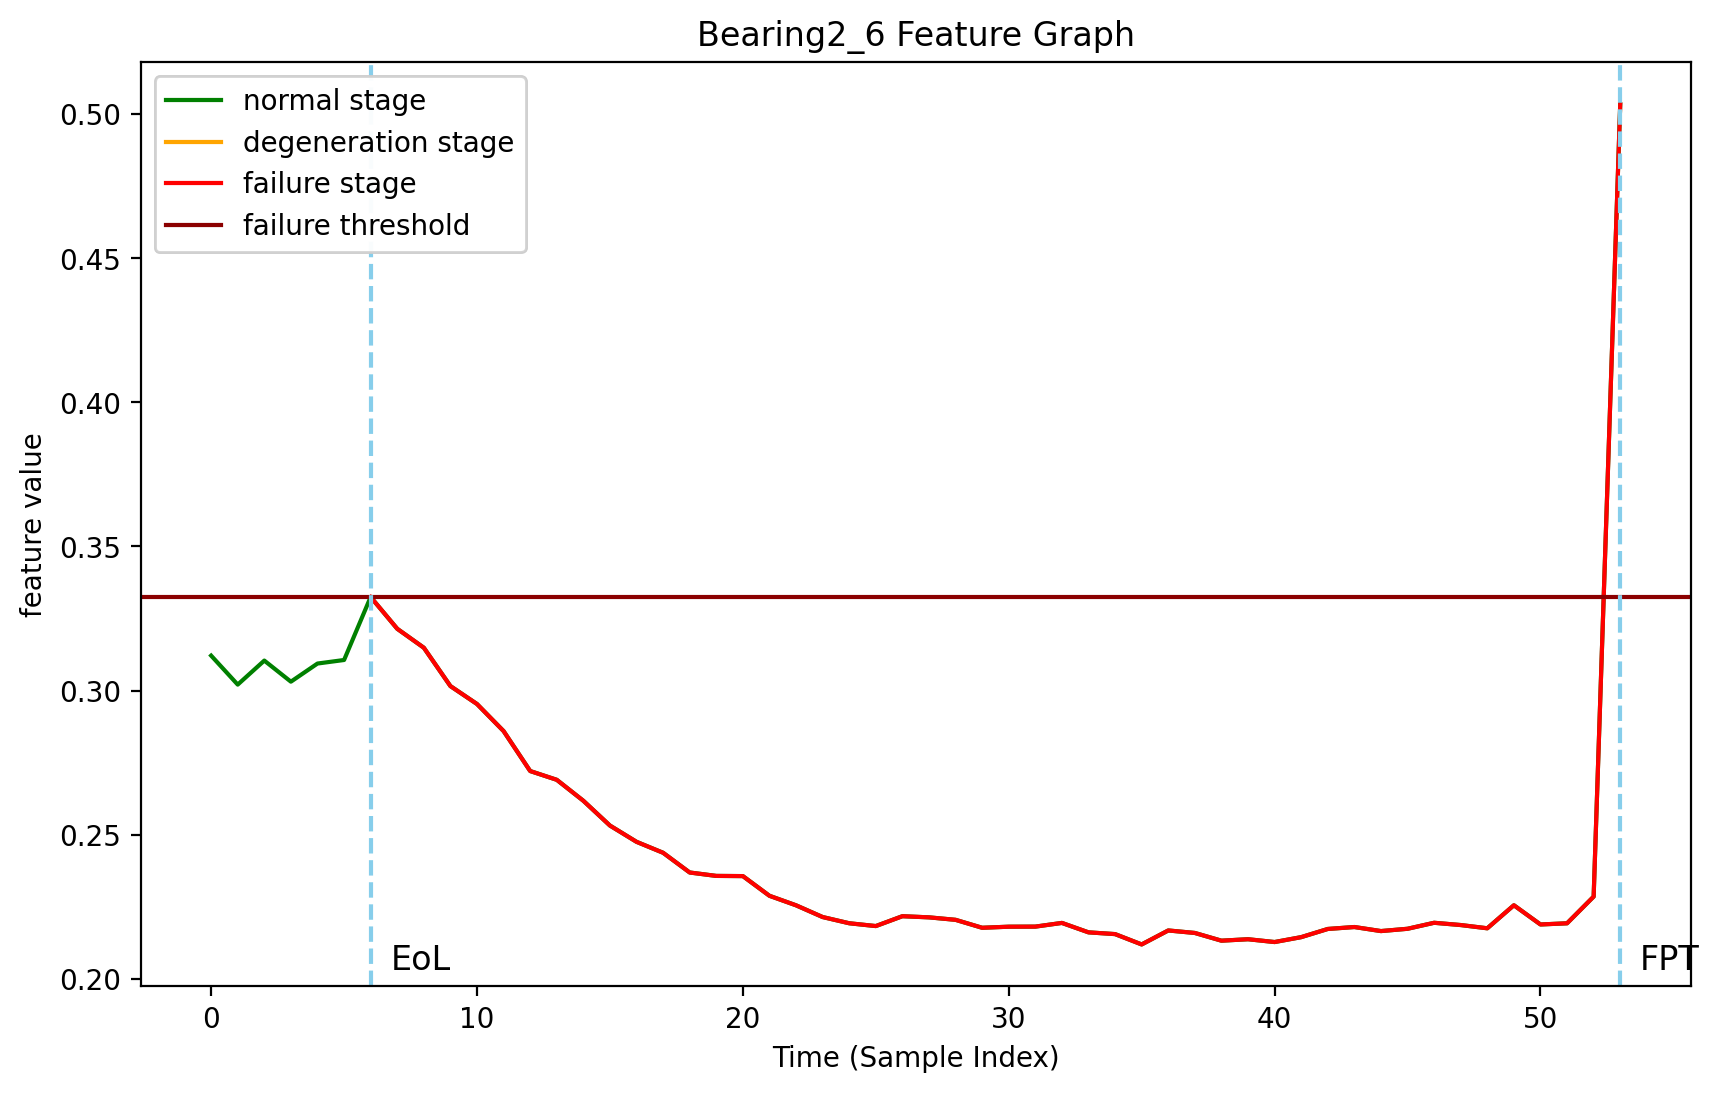

In [35]:
plot("Bearing2_6")

计时时长：0.57 s


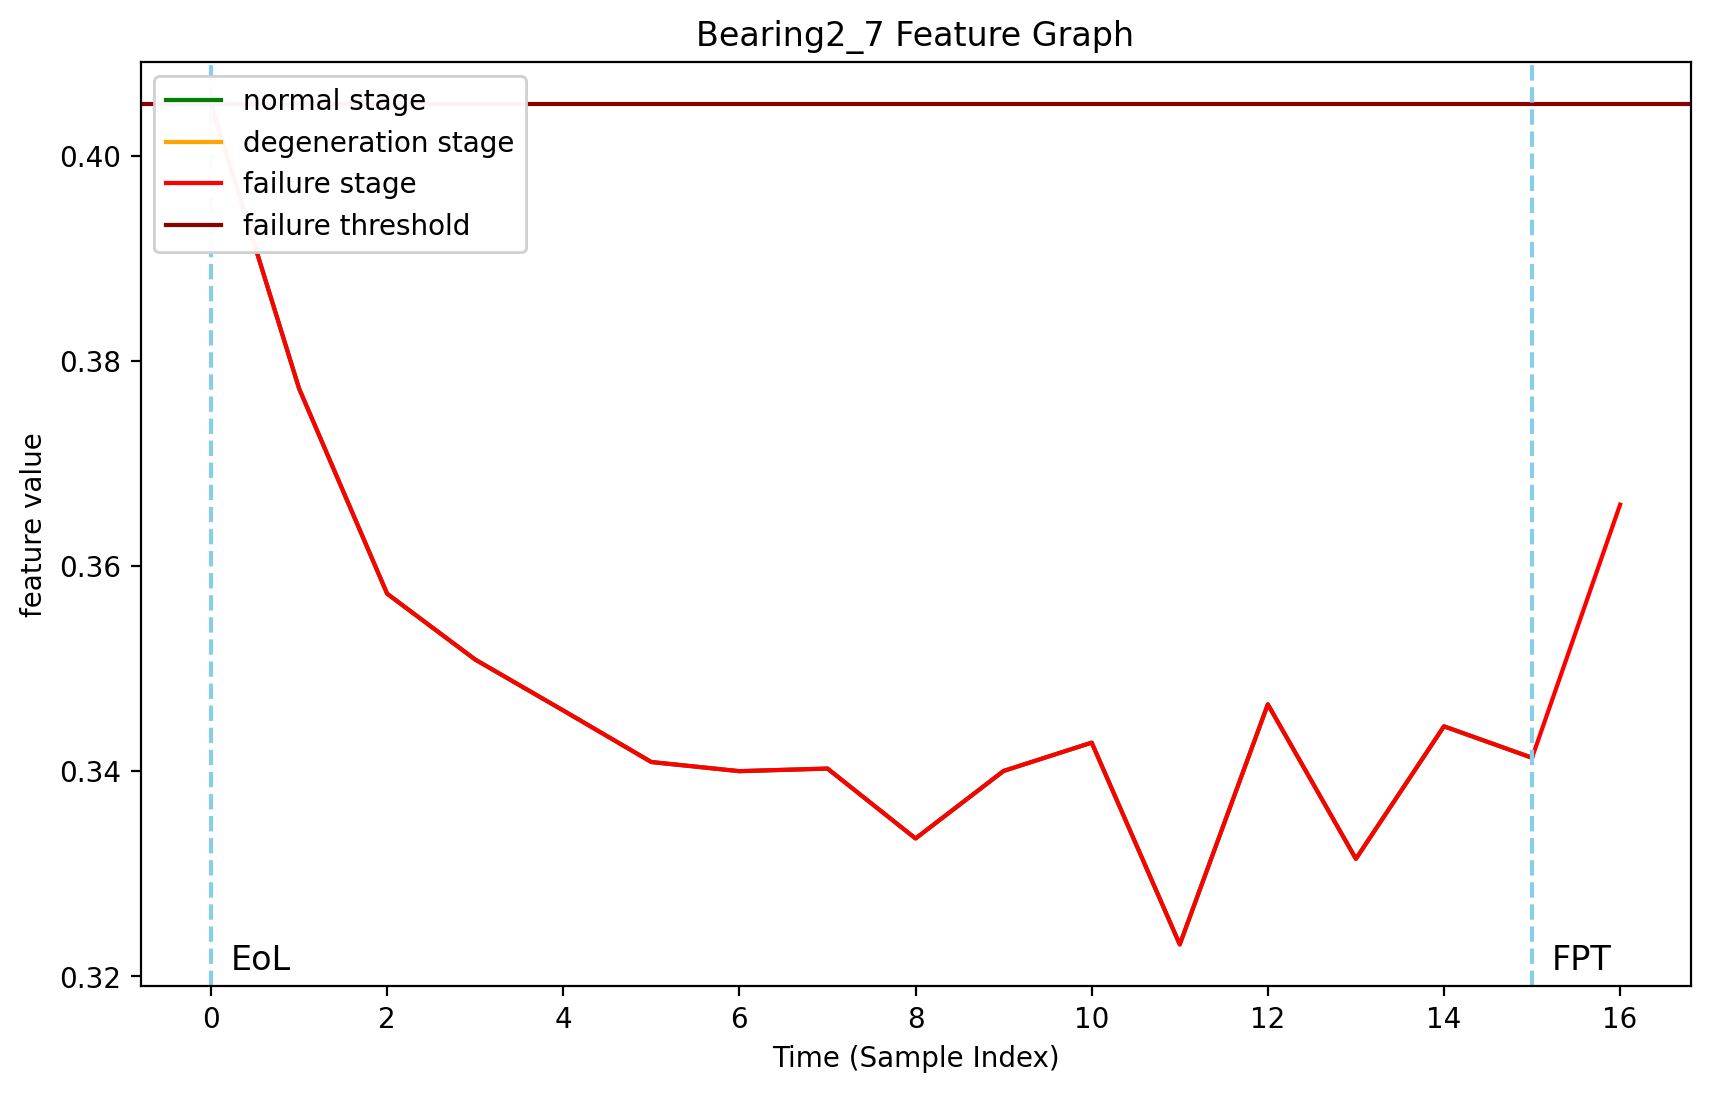

In [36]:
plot("Bearing2_7")

计时时长：1.1 s


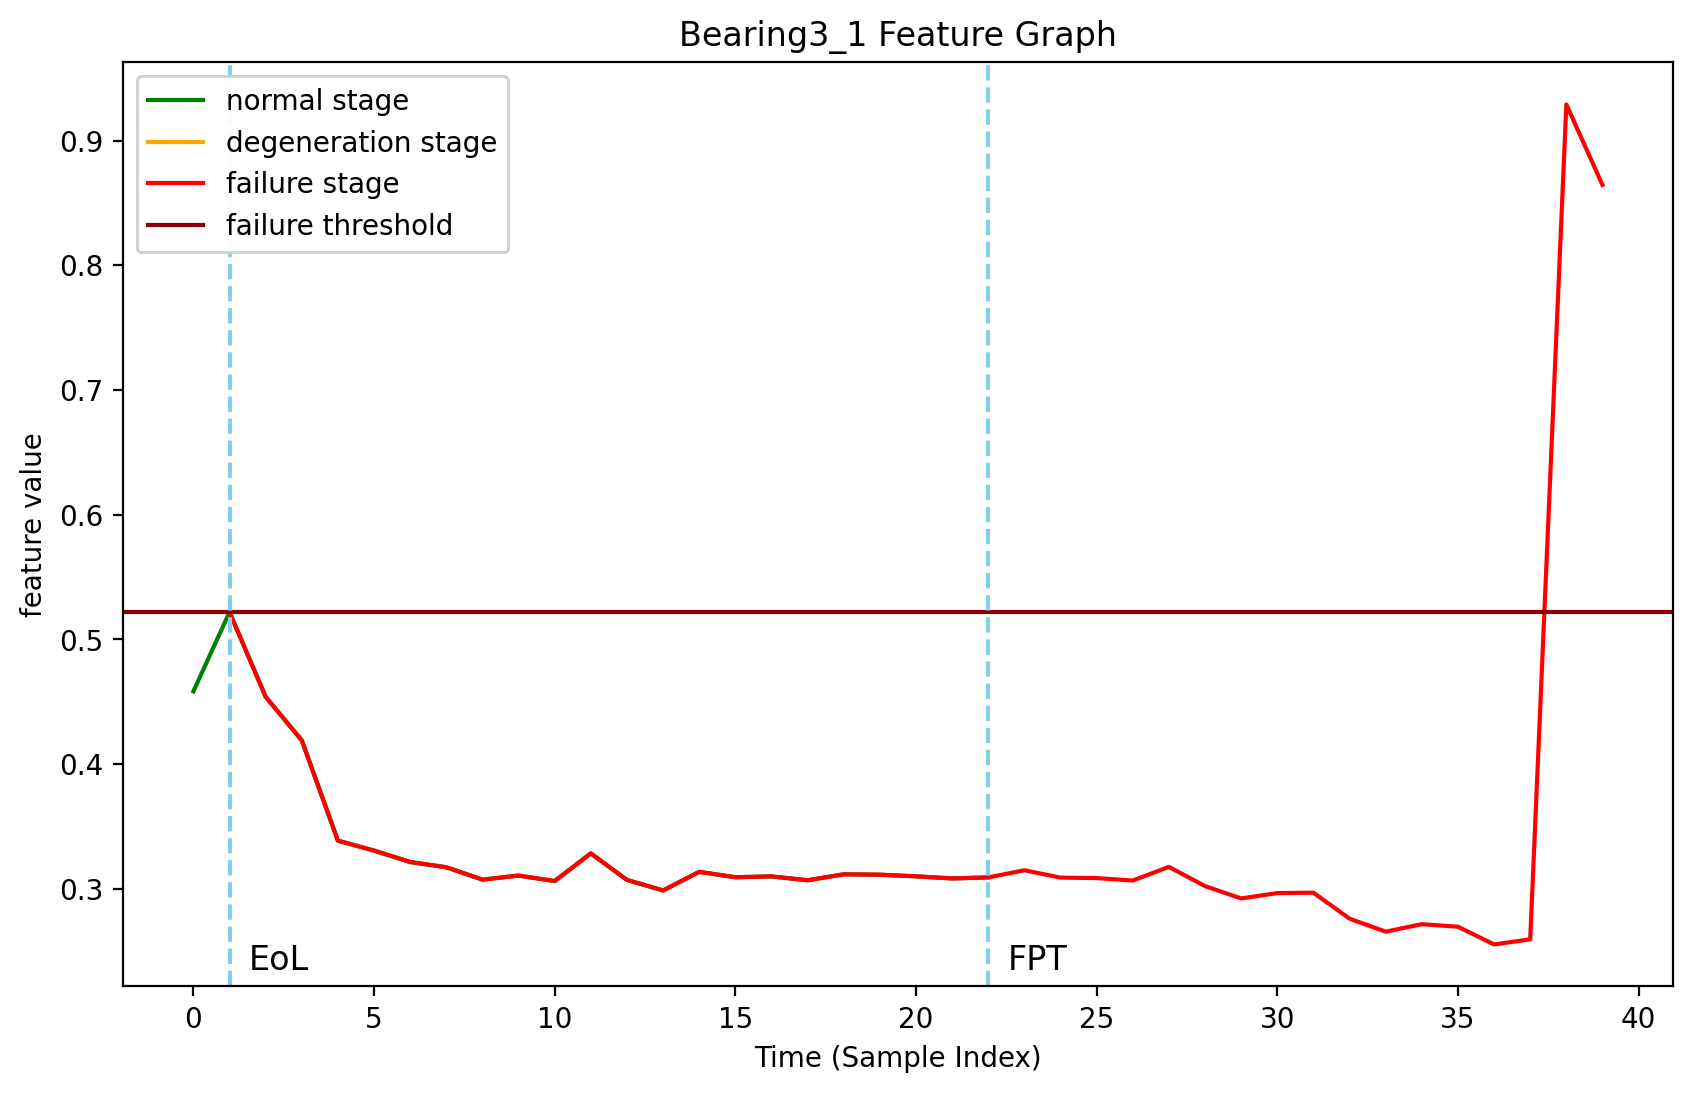

In [37]:
plot("Bearing3_1")

计时时长：3.06 s


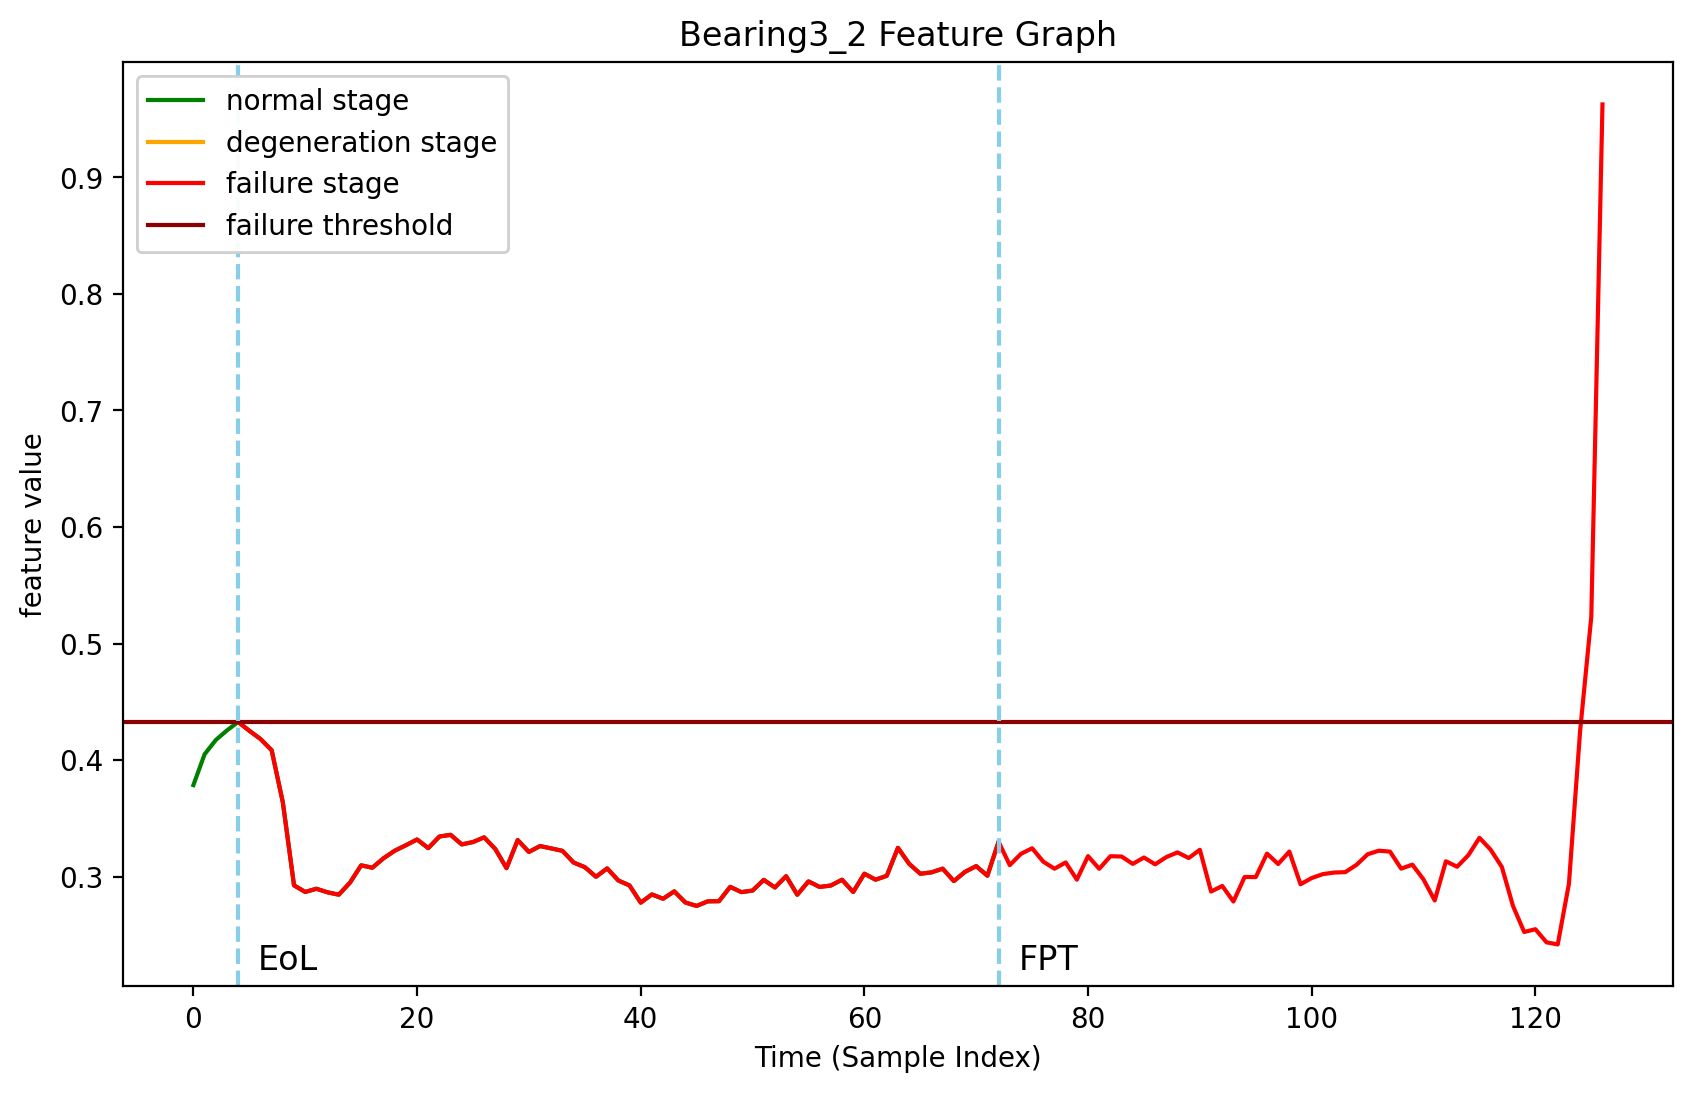

In [38]:
plot("Bearing3_2")

计时时长：0.99 s


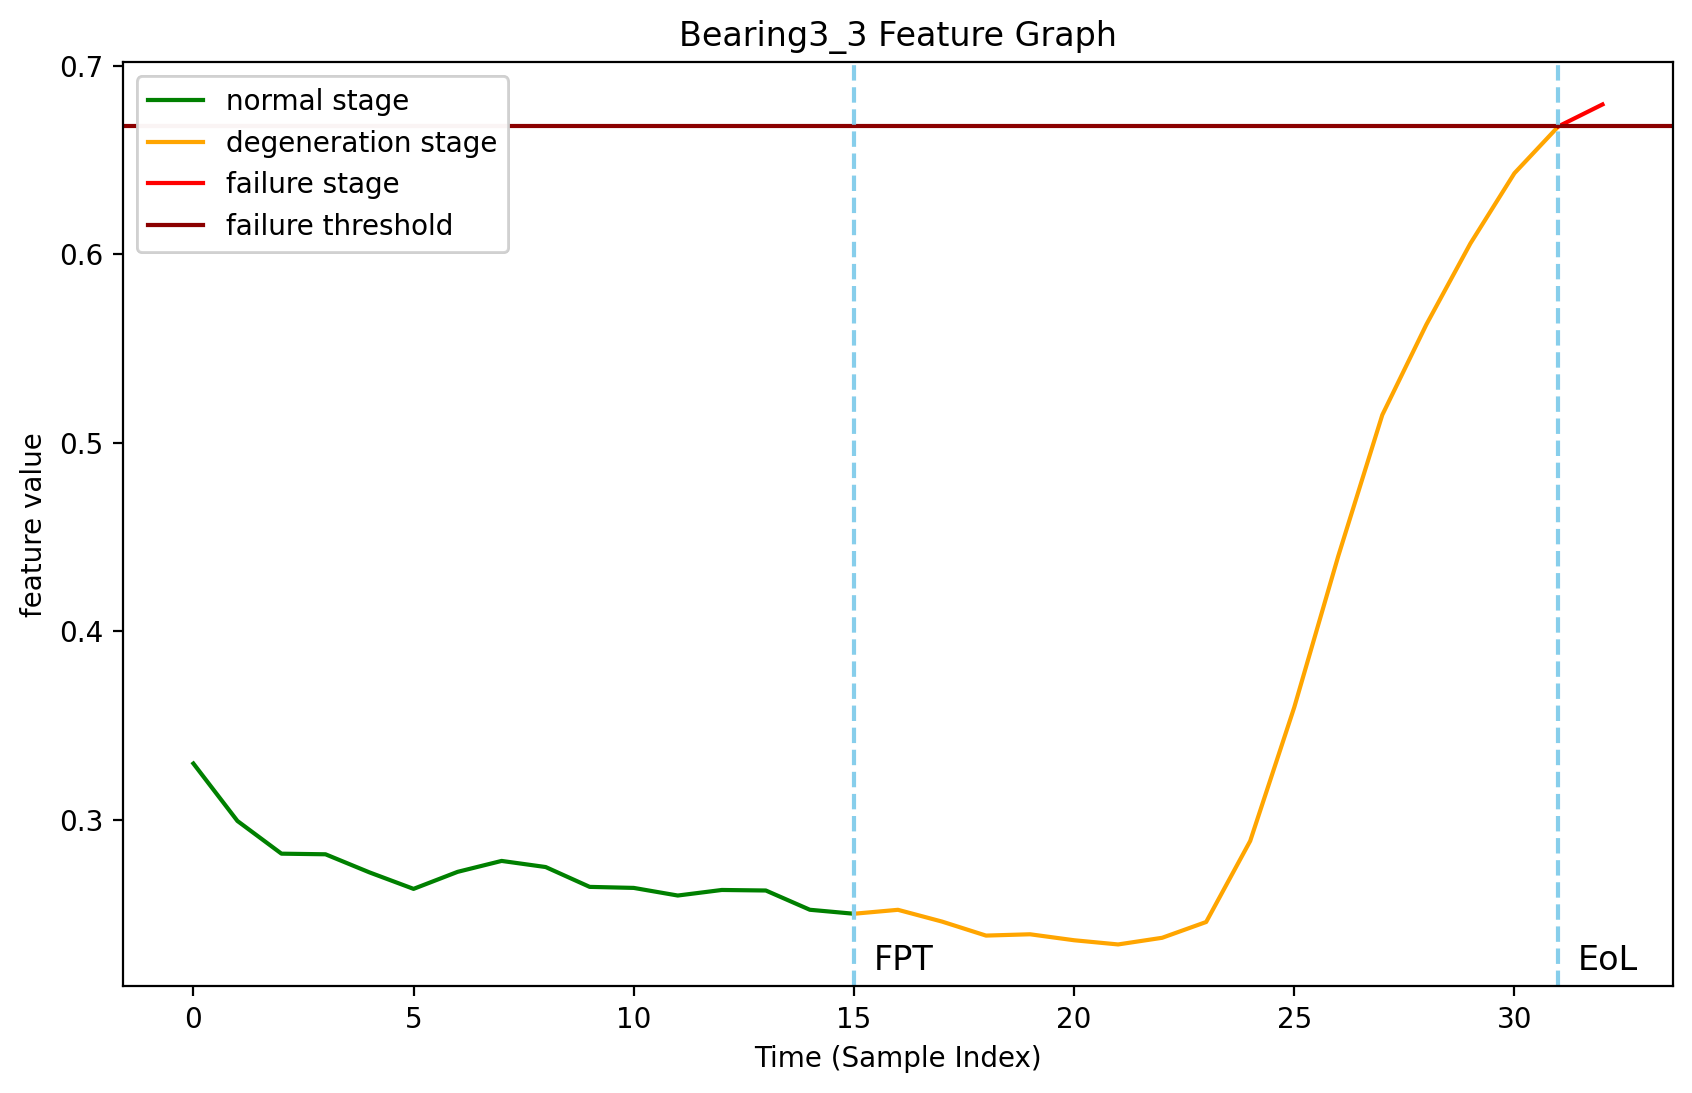

In [39]:
plot("Bearing3_3")